# Emerging Technologies Assessment: Classical and Quantum Algorithms

In [1]:
# Imports
import random
import itertools
from typing import Callable

## Problem Structure

Before diving into the problems themselves, it's worth taking a moment to explain how each one is laid out. Every problem follows the same structure, not just for the sake of consistency, but because working through each section in order reflects how I actually approached the problem: understanding it first, planning a solution, writing the code, and then stepping back to reflect on what it all means.

---

### Problem Statement

Each problem opens with its **number and title**, followed by a **problem statement** that restates the task in my own words. Rather than copying the instructions verbatim, I find that paraphrasing forces me to confirm I've actually understood what's being asked before I write a single line of code.

### Background & Context

From there, the **background and context** section sets the scene. This is where I introduce any concepts, definitions, or theory that the problem builds on, written for someone who might be encountering these ideas for the first time. Think of it as the reading you'd do before sitting down to work.

### Approach & Reasoning

Once the groundwork is laid, the **approach and reasoning** section explains how I planned to solve the problem and why. This is less about the code itself and more about the thinking behind it: what decisions I made, what alternatives I considered, and what logic guided me toward my final solution.

### Implementation

The **implementation** section is where the code lives. If I experimented with different approaches along the way, I'll include those variations here with notes on what each one does and why I moved in a particular direction.

### Test Cases

After the implementation comes **test cases**, where I verify that the code actually does what it's supposed to. This includes both typical inputs and edge cases, the kinds of scenarios designed to catch anything that might slip through.

### Results & Demonstration

The **results and demonstration** section then shows the code in action, with real outputs so the reader can see the solution working rather than just taking my word for it.

### Interpretation & Discussion

Following that, **interpretation and discussion** is where I zoom out and reflect. What did this problem teach me? Are there any interesting patterns or surprising results? How does this connect to the broader ideas from the module?

### Efficiency & Limitations

The **efficiency and limitations** section takes an honest look at the solution's weaknesses. No solution is perfect, and this is where I consider things like time complexity, edge cases, or constraints that might make the approach break down in other contexts.

### References & Sources

Finally, every problem closes with a **references and sources** section listing the documentation, articles, and resources I drew on while researching and writing my solution.

---

## Problem 1: Generating Random Boolean Functions

---

### Problem Statement

**Question:** The [Deutsch-Jozsa algorithm](https://quantum.cloud.ibm.com/learning/en/modules/computer-science/deutsch-jozsa) is designed to work with functions that accept a fixed number of [Boolean inputs](https://realpython.com/python-boolean/) and return a single [Boolean output](https://realpython.com/python-boolean/). Each function is guaranteed to be either constant (always returns ``False`` or always returns ``True``) or balanced (returns ``True`` for exactly half of the possible input combinations). Write a Python function ``random_constant_balanced`` that returns a randomly chosen function from the set of constant or balanced functions taking four Boolean arguments as inputs.

### Background & Context

Before we can appreciate what makes the Deutsch-Jozsa algorithm remarkable, we need to understand the kind of problem it's actually solving.

At the heart of it all is the [Boolean function](https://en.wikipedia.org/wiki/Boolean_function), a mathematical function that takes one or more ``True``/``False`` inputs and returns a single ``True``/``False`` output. These functions are the building blocks of digital logic and computer circuits. A simple one-input Boolean function might always return ``True`` no matter what you give it, or it might flip its input, returning ``False`` when given ``True`` and vice versa:
```python
def not_function(x):
    return not x

print(not_function(True))   # Output: False
print(not_function(False))  # Output: True
```

Now scale that up to four inputs, and things get more interesting. With four Boolean inputs, there are 2⁴ = 16 possible input combinations, ranging from 0000 to 1111 in binary. A function over four inputs must decide what to return for every single one of those 16 cases.

The [Deutsch-Jozsa algorithm](https://en.wikipedia.org/wiki/Deutsch%E2%80%93Jozsa_algorithm), introduced by [David Deutsch and Richard Jozsa in 1992](https://royalsocietypublishing.org/doi/10.1098/rspa.1992.0167), narrows its attention to two special categories of such functions. **Constant functions** are the simplest possible case: they ignore their input entirely and always return the same value. For four inputs, only two such functions exist, always ``True`` or always ``False``. **Balanced functions** are more nuanced: they return ``True`` for exactly half the possible inputs and ``False`` for the other half, meaning exactly 8 of those 16 combinations land on each side.

Why does any of this matter? Because determining which category a function belongs to turns out to be a surprisingly powerful test case for quantum computing. Classically, you might need to evaluate the function many times before you can be certain of the answer. The Deutsch-Jozsa algorithm solves it in a single pass, making it [one of the earliest demonstrations](https://quantum.country/qcvc) that quantum computers can outperform classical ones on a well-defined problem. It's not a practical algorithm in the everyday sense, but it cracked open the door to results like [Shor's algorithm](https://en.wikipedia.org/wiki/Shor%27s_algorithm) that very much are. Understanding how to generate and work with constant and balanced functions classically is our first step toward appreciating that quantum leap.

### Approach & Reasoning

The task is to write a Python function that randomly generates either a constant or balanced Boolean function with four inputs. Before writing any code, it's worth thinking carefully about two things: how to *represent* such a function, and how to ensure the randomness satisfies the mathematical constraints.

The natural choice for representation is a lookup table. With four Boolean inputs, there are 2⁴ = 16 possible input combinations, each of which can be expressed as a tuple like ``(True, False, True, False)``. A [Python dictionary](https://realpython.com/python-dicts/) maps each of these 16 tuples to either ``True`` or ``False``, giving us a complete description of the function's behaviour.

With the data structure settled, the next question is how to populate it. The first step is to randomly decide which type of function to generate, and Python's [``random`` module](https://docs.python.org/3/library/random.html) makes this easy. A single call to ``random.choice()`` picks between constant and balanced with equal probability.

From there, the two cases diverge. A constant function is the simpler of the two: pick either ``True`` or ``False`` at random, then assign that same value to all 16 input combinations. There's no further constraint to satisfy.

A balanced function requires a bit more care. Exactly 8 of the 16 inputs must return ``True`` and the remaining 8 must return ``False``, but which inputs land on which side should be chosen randomly. To do this, we first generate all 16 input combinations using [``itertools.product()``](https://docs.python.org/3/library/itertools.html#itertools.product), which constructs the [Cartesian product](https://en.wikipedia.org/wiki/Cartesian_product) of Boolean values efficiently. Then ``random.sample()`` selects exactly 8 of those combinations without replacement, those become the ``True`` outputs, and the rest become ``False``. This guarantees the balanced property while keeping the selection genuinely random.

Finally, rather than returning the dictionary directly, we wrap the lookup in a Python function using a [``def`` statement](https://realpython.com/python-lambda/) that takes four Boolean arguments and returns the corresponding value from the table. This gives us a proper callable that behaves like any other Boolean function and can be passed around and tested in the problems that follow.

### Implementation

In [2]:
import itertools
import random
from typing import Callable

In [13]:
def random_constant_balanced() -> Callable[[bool, bool, bool, bool], bool]:
    """
    Returns a randomly chosen constant or balanced Boolean function with four inputs.
    
    A constant function always returns the same value (True or False) for all inputs.
    A balanced function returns True for exactly half (8) of the 16 possible inputs
    and False for the other half.
    
    Returns:
        A callable function that takes four boolean arguments and returns a boolean.
    """
    # Generate all 16 possible input combinations for 4 boolean inputs
    all_inputs = list(itertools.product([False, True], repeat=4))
    
    # Randomly decide whether to generate a constant or balanced function
    function_type = random.choice(['constant', 'balanced'])
    
    # Create the lookup table (dictionary mapping inputs to outputs)
    lookup_table = {}
    
    if function_type == 'constant':
        # For constant function: all inputs map to the same random value
        constant_value = random.choice([True, False])
        for input_combo in all_inputs:
            lookup_table[input_combo] = constant_value
    else:
        # For balanced function: exactly 8 inputs return True, 8 return False
        # Randomly select 8 inputs to return True
        true_inputs = set(random.sample(all_inputs, 8))
        for input_combo in all_inputs:
            lookup_table[input_combo] = input_combo in true_inputs
        
    def boolean_function(a: bool, b: bool, c: bool, d: bool) -> bool:
        """
        Boolean function with four inputs.
        
        Args:
            a, b, c, d: Four boolean inputs.
            
        Returns:
            Boolean output based on the lookup table.
        """
        return lookup_table[(a, b, c, d)]
    
    # Attach metadata to help identify the function type (useful for testing)
    boolean_function.function_type = function_type
    boolean_function.lookup_table = lookup_table
    
    return boolean_function
    
    

### Test Cases

In [3]:
def test_constant_function(f: Callable[[bool, bool, bool, bool], bool]) -> bool:
    """
    Test if a function is constant (returns the same value for all inputs).
    
    Args:
        f: A boolean function with four inputs.
        
    Returns:
        True if the function is constant, False otherwise.
    """
    all_inputs = list(itertools.product([False, True], repeat=4))
    results = [f(*inputs) for inputs in all_inputs]
    # A constant function returns all True or all False
    return all(results) or not any(results)


def test_balanced_function(f: Callable[[bool, bool, bool, bool], bool]) -> bool:
    """
    Test if a function is balanced (returns True for exactly half of inputs).
    
    Args:
        f: A boolean function with four inputs.
        
    Returns:
        True if the function is balanced, False otherwise.
    """
    all_inputs = list(itertools.product([False, True], repeat=4))
    results = [f(*inputs) for inputs in all_inputs]
    # A balanced function returns True for exactly 8 inputs
    return sum(results) == 8


def run_tests(num_tests: int = 100) -> None:
    """
    Run multiple tests to verify the random_constant_balanced function.
    
    Args:
        num_tests: Number of random functions to generate and test.
    """
    constant_count = 0
    balanced_count = 0
    
    for i in range(num_tests):
        f = random_constant_balanced()
        
        is_constant = test_constant_function(f)
        is_balanced = test_balanced_function(f)
        
        # Each function should be exactly one type
        assert is_constant != is_balanced, f"Test {i}: Function is neither constant nor balanced, or both!"
        
        # Verify metadata matches actual behavior
        if is_constant:
            assert f.function_type == 'constant', f"Test {i}: Metadata says balanced but function is constant"
            constant_count += 1
        else:
            assert f.function_type == 'balanced', f"Test {i}: Metadata says constant but function is balanced"
            balanced_count += 1
    
    print(f"All {num_tests} tests passed!")
    print(f"Generated {constant_count} constant functions and {balanced_count} balanced functions")
    print(f"Ratio: {constant_count/num_tests:.1%} constant, {balanced_count/num_tests:.1%} balanced")


# Run the tests
run_tests(100)

All 100 tests passed!
Generated 48 constant functions and 52 balanced functions
Ratio: 48.0% constant, 52.0% balanced


### Results and Demonstration

Running the test suite shows that our implementation correctly generates both constant and balanced Boolean functions. The output demonstrates that all 100 generated functions pass their respective tests, with a roughly equal distribution between constant and balanced functions due to the random selection process.

### Interpretation and Discussion

To really appreciate what this implementation is doing, it helps to step back and think about the landscape it's operating in — and why a quantum computer would care about any of this in the first place.

**The Boolean Function Universe**: When we work with four Boolean inputs, we're standing at the edge of a surprisingly vast space. There are 2^16 = 65,536 different Boolean functions that could exist over those inputs, each one a unique mapping from inputs to outputs. But here's the thing — the [Deutsch-Jozsa algorithm](https://royalsocietypublishing.org/doi/10.1098/rspa.1992.0167) doesn't care about most of them. It's only interested in two types: the 2 constant functions, and the C(16,8) = 12,870 balanced ones. That's less than 20% of the total, which tells us this algorithm isn't a blunt general-purpose tool. It's a precision instrument, built for a very specific mathematical question. This kind of deliberate narrowing isn't a limitation, it's a feature. As [Sipser (2012)](https://mitpress.mit.edu/9780262018302/) explains in his foundational work on computation theory, many of the most powerful algorithms in [computational complexity theory](https://mitpress.mit.edu/9780262533379/) gain their strength precisely by restricting themselves to problem spaces with special structure. Deutsch-Jozsa is a textbook example of that philosophy.

**Randomness in Algorithm Testing**: Of course, building the functions is only half the story, we also need to test them fairly. That's where Python's `random` module comes in, letting us generate constant and balanced functions with equal probability. This uniform distribution might seem like a minor detail, but it matters. A biased sample could quietly skew our results, making one approach look stronger than it really is. The [pseudorandom generation](https://docs.python.org/3/library/random.html) is more than adequate for a demonstration like this, though as [Knuth (1997)](https://www-cs-faculty.stanford.edu/~knuth/taocp.html) points out in *The Art of Computer Programming*, truly rigorous formal analysis would demand randomness sourced from quantum or dedicated hardware, not a software approximation.

**Storage Trade-offs**: Once we have our functions, we need somewhere to put them. Representing Boolean functions as lookup tables is a natural choice, it gives us instant O(1) access to any output. But that convenience comes at a cost: O(2^n) storage space. With four inputs, holding 16 key-value pairs feels almost trivial. Scale up even modestly, though, and the picture changes dramatically. [Savage (1998)](https://www.elsevier.com/books/models-of-computation/savage/978-0-12-619851-0) traces these exponential blowups carefully in his models of computation text, painting a clear picture of why storing Boolean functions classically becomes practically impossible as the number of inputs grows. This isn't just an inconvenience, it's a fundamental wall.

**Classical Verification Costs**: To check whether a function is constant or balanced, our test functions do the only thing classical computation can do: check every possible input, one by one. It's exhaustive, it's guaranteed to be correct, and it's exactly the kind of brute-force approach that reveals why classical computers struggle with this problem. As [Nielsen & Chuang (2010)](https://www.cambridge.org/highereducation/books/quantum-computation-and-quantum-information/01E10196D0A682A6802309D06B22D27D) show in their landmark quantum computing textbook, in the worst case you have to evaluate at least half the inputs plus one before you can be certain of your answer. There's no shortcut available, you simply have to look.

**Quantum Speedup Context**: And that's precisely what makes the [quantum version](https://quantum.country/qcvc) so striking by comparison. A classical computer needs up to 2^(n-1) + 1 function calls to distinguish constant from balanced, nine calls for four inputs. A quantum computer needs exactly one oracle call, regardless of how large the input space grows. That's not a modest improvement; it's an exponential separation. [Bernstein & Vazirani (1997)](https://epubs.siam.org/doi/10.1137/S0097539796300921) showed that this gap extends well beyond Deutsch-Jozsa to a whole family of similar problems, establishing it as a genuine and deep property of quantum query complexity rather than a one-off curiosity.

**Function Objects and Abstraction**: There's also something worth noticing about the way the code is structured. Each generated function bundles its lookup behaviour together with metadata about what type of function it is. This isn't accidental, it reflects a powerful design philosophy that Python's first-class functions make possible. [Abelson & Sussman (1996)](https://mitpress.mit.edu/9780262510875/) spend considerable time on exactly this kind of abstraction in *Structure and Interpretation of Computer Programs*, showing how treating functions as data, objects that can carry information and be passed around — unlocks a level of elegance that would otherwise require far messier solutions.

**Mathematical Foundations**: Underlying all of this is the formal mathematics of Boolean algebra. A constant function is one where f(x₁,x₂,x₃,x₄) = c for some fixed value c, no matter what the inputs are. A balanced function is one where exactly half the inputs map to True, |{x: f(x) = True}| = 2^(n-1). These definitions, drawn from [discrete mathematics](https://en.wikipedia.org/wiki/Boolean_function) and explored thoroughly in [Rosen (2019)](https://www.mheducation.com/highered/product/discrete-mathematics-applications-rosen/M9781259676512.html), aren't just abstract formalism. They're the precise conditions that make the quantum algorithm possible at all.

Taken together, this classical implementation does something valuable: it makes the problem tangible. It shows us exactly where classical computation hits its limits, and in doing so, explains why researchers started looking elsewhere. As [Preskill (2018)](https://quantum-journal.org/papers/q-2018-08-06-79/) argues in his analysis of the current era of quantum computing, understanding those classical boundaries is the first step toward appreciating what quantum approaches genuinely offer — and why the difference matters.

### Efficiency and Limitations

**How Fast Does It Run?**
The `random_constant_balanced()` function takes O(2^n) time where n equals the number of inputs (4 in our case). The main time costs come from:

- Building all input combinations with `itertools.product()`: O(2^n)
- Filling the lookup table with dictionary assignments: O(2^n)
- Selecting random samples for balanced functions: O(2^n) from `random.sample()`

For four Boolean inputs, this gives us O(16) = O(1) constant time, making the function quite fast for this problem size.

**Memory Usage**
We also need O(2^n) space since we store a complete lookup table mapping each possible input to its output. With four inputs, this means 16 key-value pairs plus some metadata, using roughly 1-2 KB per function. Modern computers handle this easily.

**Where It Breaks Down**
This approach hits serious problems as input size grows:

- **8 inputs**: 256 entries (still fine)
- **10 inputs**: 1,024 entries (manageable)  
- **20 inputs**: 1,048,576 entries (over a million, getting difficult)
- **30 inputs**: Over a billion entries (completely impractical)

This exponential explosion shows why [classical simulation of quantum algorithms becomes impossible](https://www.nature.com/articles/s41567-019-0648-8) for realistic problem sizes.

**Built-in Restrictions**

Several limitations constrain our approach:

1. **Fixed Input Size**: The code only handles exactly four Boolean inputs. Making it work for any number of inputs would require rewriting the function signature and internal logic.

2. **Memory Hungry**: The lookup table trades space for speed. For bigger problems, [implicit function representation](https://en.wikipedia.org/wiki/Boolean_function#Representation) or [algebraic normal form](https://en.wikipedia.org/wiki/Algebraic_normal_form) would work better.

3. **Pseudorandom Only**: We rely on Python's `random` module, which uses the [Mersenne Twister](https://docs.python.org/3/library/random.html#random.seed) algorithm. For cryptographic work or formal randomness requirements, we'd need a [cryptographically secure random source](https://docs.python.org/3/library/secrets.html).

**Performance Bottlenecks**
A few operations slow things down:
- The `random.sample()` call for balanced functions has O(n) complexity and creates a temporary list of all inputs
- Dictionary creation computes hash values for tuple keys, though this usually runs very fast
- Function call overhead in the returned callable adds small but measurable cost

**Classical vs Quantum Comparison**
While generating these functions runs efficiently, figuring out whether an unknown function is constant or balanced classically requires up to 2^(n-1) + 1 function calls. For four inputs, this means up to 9 calls versus the quantum algorithm's single call. That's a 9x speedup. For larger inputs, this gap becomes exponentially huge.

**Better Approaches for Larger Problems**
When research requires many random functions, more efficient methods include:
1. Generating and caching commonly used function types ahead of time
2. Using [lazy evaluation](https://en.wikipedia.org/wiki/Lazy_evaluation) to avoid storing the full lookup table
3. Implementing [streaming algorithms](https://en.wikipedia.org/wiki/Streaming_algorithm) when memory gets tight

Our current approach prioritizes clarity and correctness over maximum speed. This makes it perfect for educational purposes and small quantum algorithm demos, while clearly showing the computational challenges that motivate quantum computing research.

### References

- [Rapid Solution of Problems by Quantum Computation - Deutsch & Jozsa (1992)](https://doi.org/10.1098/rspa.1992.0167) - *Original Deutsch-Jozsa algorithm paper defining constant vs balanced classification.*

- [Quantum Theory, the Church-Turing Principle and the Universal Quantum Computer - Deutsch (1985)](https://doi.org/10.1098/rspa.1985.0070) - *Foundational paper proposing quantum computation and the single-bit problem.*

- [Quantum Computing Since Democritus - Aaronson (2013)](https://www.cambridge.org/core/books/quantum-computing-since-democritus/F77C0E5B2E37A0B05BDE0835E582E41E) - *Discusses query complexity and oracle separations for Deutsch-Jozsa.*

- [Quantum Computation and Quantum Information - Nielsen & Chuang (2010)](https://www.cambridge.org/highereducation/books/quantum-computation-and-quantum-information/01E10196D0A682A6802309D06B22D27D) - *Standard textbook covering Deutsch-Jozsa with full mathematical treatment.*

- [Quantum Complexity Theory - Bernstein & Vazirani (1997)](https://doi.org/10.1137/S0097539796300921) - *Extends Deutsch-Jozsa to prove broader quantum-classical separations.*

- [Quantum Computing in the NISQ Era and Beyond - Preskill (2018)](https://doi.org/10.22331/q-2018-08-06-79) - *Contextualizes idealized algorithmic advantages against practical hardware constraints.*

- [Quantum Algorithms Revisited - Cleve, Ekert, Macchiavello & Mosca (1998)](https://doi.org/10.1098/rspa.1998.0164) - *Reformulates Deutsch-Jozsa through quantum phase estimation and interference. [arXiv:quant-ph/9708016](https://arxiv.org/abs/quant-ph/9708016).*

- [Introduction to the Theory of Computation - Sipser (2012)](https://mitpress.mit.edu/9780262018302/) - *Formal foundations for oracle models and decision problems.*

- [The Art of Computer Programming, Volume 2 - Knuth (1997)](https://www-cs-faculty.stanford.edu/~knuth/taocp.html) - *Covers pseudorandom number generation used in Python's `random` module.*

- [Models of Computation - Savage (1998)](https://doi.org/10.1007/978-1-4612-0575-8) - *Discusses exponential blowup in truth table representations of Boolean functions.*

- [Structure and Interpretation of Computer Programs - Abelson & Sussman (1996)](https://mitpress.mit.edu/9780262510875/) - *Functions as first-class objects, relevant to our callable function design.*

- [Discrete Mathematics and Its Applications - Rosen (2019)](https://www.mheducation.com/highered/product/discrete-mathematics-applications-rosen/M9781259676512.html) - *Boolean algebra foundations and combinatorial basis for balanced function counting.*

- [Quantum Computing for the Very Curious - Matuschak & Nielsen (2019)](https://quantum.country/qcvc) - *Interactive essay on quantum superposition and interference.*

- [Quantum Algorithm Implementations for Beginners - Coles et al. (2022)](https://doi.org/10.1145/3517340) - *Practical Deutsch-Jozsa implementation with code examples. [arXiv:1804.03719](https://arxiv.org/abs/1804.03719).*

- [Quantum Computing Lecture Notes - de Wolf (2019)](https://homepages.cwi.nl/~rdewolf/qcnotes.pdf) - *Rigorous query complexity theory and classical lower bounds for Deutsch-Jozsa.*

- [Quantum Supremacy Using a Programmable Superconducting Processor - Arute et al. (2019)](https://doi.org/10.1038/s41586-019-1666-5) - *Google's demonstration of quantum computational advantage over classical simulation.*

- [Python random Module Documentation](https://docs.python.org/3/library/random.html) - *Reference for `random.sample()` used in balanced function generation.*

- [Python itertools.product() Documentation](https://docs.python.org/3/library/itertools.html#itertools.product) - *Reference for generating Cartesian products of input iterables.*

- [Python secrets Module Documentation](https://docs.python.org/3/library/secrets.html) - *Cryptographically secure alternative to `random` for formal analysis.*

---

## Problem 2: Classical Testing for Function Type

---

### Problem Statement

**Question:** [Deutsch's algorithm](https://quantum.cloud.ibm.com/learning/en/courses/fundamentals-of-quantum-algorithms/quantum-query-algorithms/deutsch-algorithm) is designed to demonstrate a [potential advantage of quantum computing](https://www.quantamagazine.org/john-preskill-explains-quantum-supremacy-20191002/) over classical computation. To understand this advantage, we must first understand the classical cost of solving the underlying problem. Write a Python function ``determine_constant_balanced`` that takes as input a function ``f``, as defined in Problem 1. The function should analyze ``f`` and return the string ``"constant"`` or ``"balanced"`` depending on whether the function is constant or balanced. Write a brief note on the efficiency of your solution. What is the maximum number of times you need to call ``f`` to be 100% certain whether it is constant or balanced?

### Background & Context

The problem of determining whether a Boolean function is constant or balanced sits at the heart of understanding [quantum computational advantage](https://www.nature.com/articles/s41586-019-1666-5). Before we can appreciate what quantum computers offer, we need to understand how classical computers tackle this classification problem and why it proves fundamentally difficult for them.

**The Classical Decision Problem**

Given a Boolean function with n inputs, we want to determine its type with absolute certainty. For our four-input functions from Problem 1, there are 2⁴ = 16 possible input combinations. A [constant function](https://en.wikipedia.org/wiki/Constant_function) returns the same value for all 16 inputs, while a [balanced function](https://en.wikipedia.org/wiki/Boolean_function) returns ``True`` for exactly 8 inputs and ``False`` for the other 8.

**Example of the Classical Approach:**

```python
# Example: Testing if a function is constant or balanced
def example_test(f):
    first_output = f(False, False, False, False)
    second_output = f(False, False, False, True)
    
    if first_output != second_output:
        print("Function is balanced (different outputs found)")
    else:
        print("Need more tests to be certain...")

# The problem: finding different outputs proves balanced,
# but proving constant requires testing many inputs
```

**Worst-Case Analysis**

The key insight is that proving a function is balanced requires finding two inputs that give different outputs, which could happen on the second function call. However, proving a function is constant requires confirming that every possible input returns the same value. In the [worst case](https://en.wikipedia.org/wiki/Worst-case_complexity), a classical algorithm must evaluate the function at more than half of all possible inputs before it can be certain.

For n Boolean inputs:
- **Best case**: 2 function calls (find two different outputs immediately)
- **Worst case**: 2^(n-1) + 1 function calls (check more than half the inputs)
- **For 4 inputs**: Maximum of 9 function calls needed

**Why This Matters**

This problem illustrates a fundamental limitation of classical computation. As [Cleve et al. (1998)](https://royalsocietypublishing.org/doi/10.1098/rspa.1998.0164) demonstrated, classical computers face an inherent lower bound on query complexity for this decision problem. No clever algorithm or optimization can reduce the worst-case number of queries below 2^(n-1) + 1.

The [Deutsch-Jozsa algorithm](https://en.wikipedia.org/wiki/Deutsch%E2%80%93Jozsa_algorithm) revolutionized our understanding by showing that a quantum computer can solve this same problem with just one function evaluation, regardless of the number of inputs. This represents an exponential speedup: as n grows, classical computers need exponentially more queries while quantum computers need exactly one.

**Black-Box Model**

This problem uses the [oracle model](https://en.wikipedia.org/wiki/Oracle_machine) (also called black-box model), where we can only learn about the function by querying it with specific inputs. We cannot inspect its internal structure or implementation. This model allows fair comparison between classical and quantum algorithms since both receive the function as an opaque oracle. As [de Wolf (2019)](https://homepages.cwi.nl/~rdewolf/qcnotes.pdf) explains in his quantum computing lecture notes, query complexity provides a clean framework for demonstrating quantum advantages.

**Connection to Problem 1**

The functions generated in Problem 1 serve as perfect test cases for this classical testing algorithm. By constructing functions where we know the ground truth (constant or balanced), we can verify that our classical testing algorithm correctly identifies function types before comparing its performance to quantum approaches in later problems.

Understanding this classical baseline is essential. The effort required to solve this problem classically makes the single-query quantum solution all the more remarkable, demonstrating that [quantum parallelism and interference](https://quantum.country/qcvc) can provide genuine computational advantages over classical approaches.

### Approach and Reasoning

Before writing a single line of code, it's worth thinking carefully about *what we're actually trying to do* — and what information we'd need to feel confident in our answer.

**The Core Insight**: The key realisation is that we don't need to be exhaustive straight away. If we test two inputs and get two different outputs, we already know the function is balanced, a constant function, by definition, *cannot* produce different outputs. So in the best case, we can reach a conclusion after just two function calls. The harder case is constant functions, where every output looks the same, and we have to keep testing long enough to be sure we're not just getting lucky.

**The Strategy, Step by Step**: With that in mind, the approach unfolds naturally. We start by generating all 16 possible input combinations for a 4-input Boolean function — every combination from (False, False, False, False) through to (True, True, True, True). Then we walk through them one by one, calling the function on each input and watching what comes back. The moment we see two different outputs, we can stop, we have our answer. If we reach the end without ever seeing a difference, the function is constant.

**Why the Worst Case is Nine Calls**: The trickiest scenario is the one where we're testing a balanced function but happen to draw inputs from the same half first. A balanced function returns `True` for exactly 8 of the 16 inputs and `False` for the other 8. In the unluckiest possible run, we could test all 8 inputs from one group before finally hitting one from the other, that's 8 calls that all agree, plus 1 that breaks the pattern. So nine calls is the ceiling. If we've made it to nine calls without finding a difference, we can be completely certain the function is constant. Any fewer, and there's still some doubt.

**What This Tells Us About Classical Computing**: This approach is straightforward, and importantly, it's also *optimal*, no classical algorithm can do better. There's no clever trick that lets you skip inputs or infer the answer earlier. You have to look. That's precisely what makes the [quantum version](https://www.ibm.com/quantum/blog/deutsch-jozsa-algorithm) so remarkable by comparison: it resolves the same question with just a single function call, regardless of how many inputs the function takes. The gulf between nine calls and one isn't just a neat trick, it's a window into something fundamentally different about how quantum computation processes information.

### Implementation

Here's my Python function that determines whether a Boolean function is constant or balanced:

In [4]:
def determine_constant_balanced(f):
    """
    Determines whether a Boolean function with 4 inputs is constant or balanced.
    
    Args:
        f: A Boolean function that takes 4 Boolean arguments and returns a Boolean
        
    Returns:
        str: Either "constant" or "balanced"
    """
    # Generate all possible inputs (16 combinations for 4 Boolean inputs)
    all_inputs = list(itertools.product([False, True], repeat=4))
    
    # Keep track of outputs we've seen
    outputs_seen = set()
    calls_made = 0
    
    # Test each input until we can make a decision
    for inputs in all_inputs:
        # Call the function with this input combination
        result = f(*inputs)
        outputs_seen.add(result)
        calls_made += 1
        
        # If we've seen both True and False, it must be balanced
        if len(outputs_seen) == 2:
            print(f"Function is balanced (found different outputs after {calls_made} calls)")
            return "balanced"
        
        # If we've tested more than half the inputs and only seen one output,
        # it must be constant
        if calls_made > len(all_inputs) // 2:
            print(f"Function is constant (same output for {calls_made} calls)")
            return "constant"
    
    # If we've tested all inputs and only seen one output, it's definitely constant
    print(f"Function is constant (same output for all {calls_made} calls)")
    return "constant"


def count_function_calls(f):
    """
    Helper function to count exactly how many calls are needed to determine function type.
    This is useful for analyzing the efficiency of our approach.
    """
    all_inputs = list(itertools.product([False, True], repeat=4))
    outputs_seen = set()
    
    for i, inputs in enumerate(all_inputs, 1):
        result = f(*inputs)
        outputs_seen.add(result)
        
        # If we find two different outputs, we know it's balanced
        if len(outputs_seen) == 2:
            return i, "balanced"
        
        # If we've checked more than half without finding differences, it's constant
        if i > len(all_inputs) // 2:
            return i, "constant"
    
    # If we get here, all inputs gave the same output
    return len(all_inputs), "constant"

### Test Cases

To verify that our `determine_constant_balanced` function works correctly, I need to test it against functions with known types. Using the `random_constant_balanced` function from Problem 1, I can generate many test cases and verify that:

1. **Correctness**: The function correctly identifies constant functions as "constant" and balanced functions as "balanced"
2. **Efficiency**: The function uses at most 9 function calls to make its determination
3. **Consistency**: The results match the metadata attached to each generated function

In [5]:
def test_determine_constant_balanced(num_tests: int = 100) -> None:
    """
    Run comprehensive tests on the determine_constant_balanced function.
    
    Tests that:
    1. The function correctly identifies all constant functions as "constant"
    2. The function correctly identifies all balanced functions as "balanced"
    3. The function never needs more than 9 calls to determine the type
    
    Args:
        num_tests: Number of random functions to generate and test.
    """
    correct_identifications = 0
    max_calls_observed = 0
    call_counts = []
    
    print(f"Running {num_tests} tests...\n")
    
    for i in range(num_tests):
        # Generate a random function with known type
        f = random_constant_balanced()
        expected_type = f.function_type
        
        # Count how many calls our function makes
        calls_made, detected_type = count_function_calls(f)
        call_counts.append(calls_made)
        max_calls_observed = max(max_calls_observed, calls_made)
        
        # Verify correctness
        if detected_type == expected_type:
            correct_identifications += 1
        else:
            print(f"ERROR: Test {i+1} - Expected {expected_type}, got {detected_type}")
    
    # Print summary
    print(f"{'='*50}")
    print(f"TEST RESULTS SUMMARY")
    print(f"{'='*50}")
    print(f"Total tests run: {num_tests}")
    print(f"Correct identifications: {correct_identifications}/{num_tests} ({100*correct_identifications/num_tests:.1f}%)")
    print(f"Maximum calls needed: {max_calls_observed}")
    print(f"Average calls needed: {sum(call_counts)/len(call_counts):.2f}")
    print(f"Minimum calls needed: {min(call_counts)}")
    
    # Verify efficiency constraint
    assert max_calls_observed <= 9, f"Algorithm used {max_calls_observed} calls, but should use at most 9!"
    assert correct_identifications == num_tests, f"Some tests failed!"
    
    print(f"\n✓ All tests passed! Algorithm is correct and efficient.")


def test_specific_cases() -> None:
    """
    Test the algorithm on specific, hand-crafted cases to verify edge case handling.
    """
    print("Testing specific edge cases...\n")
    
    # Test 1: Always-True constant function
    def always_true(a, b, c, d):
        return True
    
    result = determine_constant_balanced(always_true)
    assert result == "constant", f"Always-True should be constant, got {result}"
    print("✓ Always-True function correctly identified as constant\n")
    
    # Test 2: Always-False constant function  
    def always_false(a, b, c, d):
        return False
    
    result = determine_constant_balanced(always_false)
    assert result == "constant", f"Always-False should be constant, got {result}"
    print("✓ Always-False function correctly identified as constant\n")
    
    # Test 3: Balanced function (returns True when first input is True)
    def first_input(a, b, c, d):
        return a  # True for 8 inputs, False for 8 inputs
    
    result = determine_constant_balanced(first_input)
    assert result == "balanced", f"First-input function should be balanced, got {result}"
    print("✓ First-input function correctly identified as balanced\n")
    
    # Test 4: Balanced function (XOR of all inputs)
    def xor_all(a, b, c, d):
        return a ^ b ^ c ^ d  # True for 8 inputs, False for 8 inputs
    
    result = determine_constant_balanced(xor_all)
    assert result == "balanced", f"XOR-all function should be balanced, got {result}"
    print("✓ XOR-all function correctly identified as balanced\n")
    
    print(f"{'='*50}")
    print("All specific test cases passed!")
    print(f"{'='*50}")


# Run the specific test cases first
test_specific_cases()

print("\n")

# Run the comprehensive random tests
test_determine_constant_balanced(100)

Testing specific edge cases...

Function is constant (same output for 9 calls)
✓ Always-True function correctly identified as constant

Function is constant (same output for 9 calls)
✓ Always-False function correctly identified as constant

Function is balanced (found different outputs after 9 calls)
✓ First-input function correctly identified as balanced

Function is balanced (found different outputs after 2 calls)
✓ XOR-all function correctly identified as balanced

All specific test cases passed!


Running 100 tests...

TEST RESULTS SUMMARY
Total tests run: 100
Correct identifications: 100/100 (100.0%)
Maximum calls needed: 9
Average calls needed: 5.81
Minimum calls needed: 2

✓ All tests passed! Algorithm is correct and efficient.


### Results and Demonstration

The test suite confirms that our `determine_constant_balanced` function works correctly. The specific test cases verify that hand-crafted constant functions (always-True and always-False) are correctly identified, as well as balanced functions like the first-input function and XOR-all function.

The comprehensive random testing shows that:

1. **100% Accuracy**: All randomly generated functions are correctly classified as either constant or balanced
2. **Efficiency Guarantee**: The algorithm never requires more than 9 function calls, confirming our worst-case analysis
3. **Early Termination**: For balanced functions, the algorithm often finds differing outputs within just 2-3 calls, demonstrating efficient early stopping

The distribution of function calls needed reveals an important pattern. Constant functions consistently require 9 calls (since we must test more than half the inputs to be certain), while balanced functions typically require far fewer calls because finding two different outputs proves the function is balanced immediately.

This demonstrates the fundamental asymmetry in the classical approach: proving a function is balanced is easy (find any two different outputs), but proving it's constant requires exhaustive testing of more than half the input space.

### Interpretation and Discussion

This classical testing function reveals the fundamental challenge that motivated [Deutsch and Jozsa's quantum algorithm](https://royalsocietypublishing.org/doi/10.1098/rspa.1992.0167). By implementing the straightforward classical approach, we can see exactly where classical computation struggles and why quantum methods offer a real advantage.

**The Asymmetry Problem**: Our algorithm treats constant and balanced functions very differently. Finding that a function is balanced can happen quickly because we just need any two inputs that give different outputs. But proving a function is constant requires us to keep testing until we have checked more than half of all possible inputs. This asymmetry means that constant functions always require the maximum number of queries, while balanced functions usually finish much faster.

This phenomenon connects to fundamental ideas in [computational complexity](https://mitpress.mit.edu/9780262018302/). Verifying a property (balanced) through counterexample is often easier than proving a universal property (constant) holds everywhere. [Arora and Barak (2009)](https://theory.cs.princeton.edu/complexity/) discuss this distinction in their computational complexity textbook, noting that existential proofs differ fundamentally from universal ones.

**Query Complexity and Information Theory**: The number of function calls our algorithm makes relates to [query complexity](https://en.wikipedia.org/wiki/Query_complexity), which measures how many times we must ask about a function to learn something about it. For the constant vs balanced decision problem, [classical query complexity](https://homepages.cwi.nl/~rdewolf/qcnotes.pdf) has a proven lower bound of 2^(n-1) + 1 queries in the worst case. This is not a limitation of our particular algorithm but rather a fundamental limit that applies to any classical approach.

[de Wolf (2019)](https://homepages.cwi.nl/~rdewolf/qcnotes.pdf) explains in his quantum computing lecture notes that this lower bound comes from information theory. A classical algorithm can only learn one bit of information per function call, and distinguishing between 2 + C(16,8) = 12,872 possible functions requires enough queries to rule out all but one possibility.

**Early Termination Strategy**: Our implementation uses a smart stopping rule. As soon as we see two different output values, we know the function is balanced and stop testing. This optimization dramatically improves average case performance for balanced functions. The test results show that balanced functions often need only 2 or 3 calls to classify, while constant functions always need the full 9 calls.

This connects to broader algorithmic principles. [Cormen et al. (2009)](https://mitpress.mit.edu/9780262046305/introduction-to-algorithms/) describe similar early termination strategies in their algorithms textbook, noting that avoiding unnecessary work often matters more than optimizing individual operations.

**The Black Box Constraint**: Our approach treats the function as a [black box or oracle](https://en.wikipedia.org/wiki/Oracle_machine). We cannot look inside to see how it works; we can only test it with specific inputs and observe the outputs. This constraint is essential for fair comparison with quantum algorithms, since both classical and quantum methods receive the function in the same opaque way.

The oracle model also matches many real world scenarios. When testing software, we often cannot access source code. When probing physical systems, we can only measure responses to inputs. [Sipser (2012)](https://mitpress.mit.edu/9780262018302/) discusses how oracle complexity provides insights into fundamental computational limits independent of implementation details.

**Statistical Observations**: Running many tests reveals interesting patterns. Constant functions form a smaller portion of the function space (only 2 out of 12,872 possible functions), so when testing random functions, we rarely see constant ones. However, our random generator produces them with 50% probability by design, giving us a balanced test suite. This design choice ensures we thoroughly test both branches of our classification algorithm.

**Connection to Quantum Advantage**: The [Deutsch-Jozsa algorithm](https://quantum.cloud.ibm.com/learning/en/modules/computer-science/deutsch-jozsa) solves this exact problem with just one function call. This exponential speedup from 2^(n-1) + 1 calls down to 1 call represents one of the earliest proven [quantum computational advantages](https://www.nature.com/articles/s41586-019-1666-5). While the problem itself has limited practical applications, it demonstrates that quantum computers can extract global information about functions more efficiently than any classical approach.

Nielsen and Chuang explain in their textbook *Quantum Computation and Quantum Information* (2010) that this speedup comes from [quantum parallelism and interference](https://quantum.country/qcvc). A quantum computer evaluates the function on a superposition of all inputs simultaneously, then uses interference to extract the global constant or balanced property without needing to look at individual outputs.

**Practical Implications**: Although the constant vs balanced problem is artificial, the underlying computational pattern appears in many useful applications. Quantum algorithms for [period finding](https://en.wikipedia.org/wiki/Shor%27s_algorithm), [database search](https://en.wikipedia.org/wiki/Grover%27s_algorithm), and [optimization](https://en.wikipedia.org/wiki/Quantum_optimization_algorithms) all exploit similar ideas about extracting global properties from functions efficiently.

### Efficiency and Limitations

**Time Complexity Analysis**

The `determine_constant_balanced()` function has different time costs depending on the function type it receives:

For constant functions:
- We must make exactly 2^(n-1) + 1 = 9 function calls to be certain
- Generating all input combinations takes O(2^n) time
- Each function call runs in O(1) time assuming the function uses a lookup table
- Total: O(2^n) time, which equals O(16) = O(1) for our four input case

For balanced functions:
- Best case: 2 function calls (first two inputs give different outputs)
- Worst case: 9 function calls (first 8 inputs happen to all give the same output)
- Average case: roughly O(1) calls since we usually find differences quickly

The key insight here is that the worst case always involves 9 calls regardless of function type. [Beals et al. (2001)](https://doi.org/10.1145/502090.502097) proved in their quantum query complexity paper that this 2^(n-1) + 1 bound is tight for any deterministic classical algorithm.

**Space Complexity**

Our algorithm uses minimal extra space:
- The set `outputs_seen` stores at most 2 Boolean values: O(1) space
- The counter variable `calls_made` uses O(1) space  
- The list of all inputs from `itertools.product()` takes O(2^n) space

Total space complexity is O(2^n) = O(16) for four inputs. Most of this comes from materializing the full list of inputs, though we could reduce this to O(1) by generating inputs on demand instead of storing them all upfront.

**Maximum Function Calls Needed**

For 100% certainty about the function type, we need at most **9 function calls** with four Boolean inputs. Here is why:

1. There are 16 possible inputs total
2. A balanced function returns True for exactly 8 inputs and False for 8 inputs
3. In the absolute worst case, we might test all 8 inputs that give the same output before finding one that gives a different output
4. After testing 8 inputs with identical outputs, the 9th input will either:
   - Give a different output (proving the function is balanced), or
   - Give the same output (but now we have tested more than half, so it must be constant)

This 2^(n-1) + 1 formula generalizes to any number of inputs:
- 1 input: 2 calls maximum
- 2 inputs: 3 calls maximum  
- 4 inputs: 9 calls maximum
- 8 inputs: 129 calls maximum
- 20 inputs: 524,289 calls maximum

The exponential growth explains why this problem becomes intractable classically for large inputs, while the [quantum solution](https://quantum.cloud.ibm.com/learning/en/modules/computer-science/deutsch-jozsa) always needs just one call.

**Limitations of Our Approach**

Several constraints affect when and how well this algorithm works:

1. **Fixed to Four Inputs**: The current implementation only handles functions with exactly four Boolean inputs. Generalizing to arbitrary input sizes would require changing how we generate input combinations and calculate the stopping threshold.

2. **Requires Honest Functions**: We assume the input function is genuinely constant or balanced. If someone provides a function that is neither (returns True for 7 inputs and False for 9 inputs, for example), our algorithm might misclassify it. Adding validation would require testing all inputs, eliminating any efficiency gains.

3. **Assumes Deterministic Functions**: The algorithm expects the function to return the same output every time for a given input. If the function behaves randomly or has side effects that change its outputs, our classification becomes meaningless.

4. **No Parallelization**: We test inputs one at a time in sequence. While we could theoretically test multiple inputs in parallel, we would still need to wait for at least half the tests to complete before making a decision. Classical parallelism cannot beat the fundamental query complexity bound.

**Comparison with Random Guessing**

An interesting baseline is random guessing. Since constant functions are extremely rare (only 2 out of 12,872 in our problem space), always guessing "balanced" would be right about 99.98% of the time for randomly chosen functions. However, this fails to provide the 100% certainty guarantee that our algorithm delivers.

[Montanaro (2015)](https://doi.org/10.1038/npjqi.2015.23) discusses how query complexity differs from decision accuracy in his survey of quantum algorithms. Having guaranteed correctness matters in applications where wrong answers are costly.

**Where Classical Testing Succeeds**

Despite its limitations, the classical approach works well when:
- The number of inputs is small (under 10 or so)
- We need a simple, understandable algorithm for teaching purposes
- We want to verify results from quantum simulations
- We lack access to quantum hardware

For educational purposes, implementing the classical solution first helps students appreciate exactly what quantum algorithms improve upon. Our test suite demonstrates this by showing the stark difference between the 9 calls needed classically versus the single quantum query.

### References

- [Rapid Solution of Problems by Quantum Computation - Deutsch & Jozsa (1992)](https://doi.org/10.1098/rspa.1992.0167) - *Original paper proving quantum exponential speedup for constant vs balanced classification.*

- [Quantum Computing Since Democritus - Aaronson (2013)](https://www.cambridge.org/core/books/quantum-computing-since-democritus/F77C0E5B2E37A0B05BDE0835E582E41E) - *Accessible discussion of query complexity and the classical lower bound tightness.*

- [Quantum Algorithms Revisited - Cleve, Ekert, Macchiavello & Mosca (1998)](https://doi.org/10.1098/rspa.1998.0164) - *Clearest explanation of why classical computation requires exponentially many queries. [arXiv:quant-ph/9708016](https://arxiv.org/abs/quant-ph/9708016).*

- [Quantum Computation and Quantum Information - Nielsen & Chuang (2010)](https://www.cambridge.org/highereducation/books/quantum-computation-and-quantum-information/01E10196D0A682A6802309D06B22D27D) - *Complete proof of the 2^(n-1) + 1 classical query requirement.*

- [Quantum Lower Bounds by Polynomials - Beals, Buhrman, Cleve, Mosca & de Wolf (2001)](https://doi.org/10.1145/502090.502097) - *Formal framework establishing tight query bounds for Deutsch-Jozsa.*

- [Quantum Algorithms: An Overview - Montanaro (2016)](https://doi.org/10.1038/npjqi.2015.23) - *Survey categorizing quantum algorithms by speedup type.*

- [Quantum Computing Lecture Notes - de Wolf (2019)](https://homepages.cwi.nl/~rdewolf/qcnotes.pdf) - *Proves the classical query complexity lower bound from information theory.*

- [Computational Complexity: A Modern Approach - Arora & Barak (2009)](https://theory.cs.princeton.edu/complexity/) - *Covers query complexity and oracle models formally.*

- [Introduction to the Theory of Computation - Sipser (2012)](https://mitpress.mit.edu/9780262018302/) - *Oracle Turing machines and relativized computation foundations.*

- [Introduction to Algorithms - Cormen, Leiserson, Rivest & Stein (2022)](https://mitpress.mit.edu/9780262046305/introduction-to-algorithms/) - *Early termination optimization and computational complexity.*

- [Quantum Supremacy Using a Programmable Superconducting Processor - Arute et al. (2019)](https://doi.org/10.1038/s41586-019-1666-5) - *Practical demonstration of the classical-quantum gap.*

- [Quantum Computing in the NISQ Era and Beyond - Preskill (2018)](https://doi.org/10.22331/q-2018-08-06-79) - *Deutsch-Jozsa advantage on noisy hardware and scaling limitations.*

- [Quantum Computing for the Very Curious - Matuschak & Nielsen (2019)](https://quantum.country/qcvc) - *Explains quantum parallelism and interference enabling single-query solutions.*

- [Polynomial-Time Algorithms for Prime Factorization and Discrete Logarithms on a Quantum Computer - Shor (1997)](https://doi.org/10.1137/S0097539795293172) - *Builds on the oracle template established by Deutsch-Jozsa.*

- [A Fast Quantum Mechanical Algorithm for Database Search - Grover (1996)](https://doi.org/10.1145/237814.237866) - *Oracle-based quantum speedup achieving quadratic advantage for search.*

- [Python itertools.product() Documentation](https://docs.python.org/3/library/itertools.html#itertools.product) - *Reference for generating input combinations.*

- [Python Sets - Real Python](https://realpython.com/python-sets/) - *Reference for tracking distinct output values during classification.*

- - -
## Problem 3: Quantum Oracles
- - -

### Problem Statement

**Question:** [Deutsch's algorithm](https://quantum.cloud.ibm.com/learning/en/courses/fundamentals-of-quantum-algorithms/quantum-query-algorithms/deutsch-algorithm) is the simplest example of a [quantum algorithm](https://www.ibm.com/quantum/blog/group-theory) using [superposition](https://scienceexchange.caltech.edu/topics/quantum-science-explained/quantum-superposition) to determine a [global property](https://plato.stanford.edu/archives/fall2008/entries/qt-entangle/#5) of a function with a single evaluation. In the single-input case, there are four possible Boolean functions. Using Qiskit, create the appropriate [quantum oracles](https://quantumcomputing.stackexchange.com/questions/4625/what-exactly-is-an-oracle/4626#4626) for each of the possible single-Boolean-input functions used in Deutsch's algorithm. Demonstrate their use and explain how each oracle implements its corresponding function.


### Background & Context

**From Multi-Input to Single-Input**

While Problems 1 and 2 dealt with four-input Boolean functions, [Deutsch's original 1985 algorithm](https://en.wikipedia.org/wiki/David_Deutsch) actually works with the simpler case of **single-input** functions. With just one Boolean input, there are only four possible Boolean functions:

| Function | f(0) | f(1) | Type | Description |
|----------|------|------|------|-------------|
| f₀ | 0 | 0 | Constant | Always returns 0 |
| f₁ | 0 | 1 | Balanced | Identity (outputs the input) |
| f₂ | 1 | 0 | Balanced | NOT (flips the input) |
| f₃ | 1 | 1 | Constant | Always returns 1 |

Classically, determining if one of these functions is constant or balanced requires **two queries** (test both f(0) and f(1)). Deutsch's algorithm achieves this with **one query** by using quantum mechanics.

**What Makes Quantum Oracles Different**

A [quantum oracle](https://quantumcomputing.stackexchange.com/questions/4625/what-exactly-is-an-oracle/4626#4626) is not just a function call-it's a **unitary transformation** that modifies quantum states. Unlike classical functions that destroy the input and produce an output, quantum operations must be [reversible](https://en.wikipedia.org/wiki/Reversible_computing) to preserve information.

The standard oracle construction uses two qubits and performs this transformation:

$$|x\\rangle |y\\rangle \\rightarrow |x\\rangle |y \\oplus f(x)\\rangle$$

The symbol ⊕ represents [XOR](https://en.wikipedia.org/wiki/Exclusive_or) (addition modulo 2). This design:
- **Preserves** the input qubit |x⟩ (no information loss)
- **Modifies** the output qubit |y⟩ by XORing it with f(x)
- **Remains reversible** (applying the oracle twice returns the original state)

**Key Insight**: When y starts in state |0⟩, the output becomes |f(x)⟩. When y starts in state |1⟩, the output becomes |1 ⊕ f(x)⟩ (the flipped value).

**Building Oracles from Quantum Gates**

Each of the four functions translates to a specific pattern of [quantum gates](https://quantum.cloud.ibm.com/learning/en/courses/basics-of-quantum-information/single-qubit-gates/common-gates):

- **X gate** (Pauli-X): The quantum NOT gate, flips |0⟩ ↔ |1⟩
- **CNOT gate** (Controlled-NOT): Flips the target qubit only when the control qubit is |1⟩
- **Identity**: Does nothing (used when the oracle shouldn't modify the qubits)

The challenge is mapping each classical function's truth table to the correct sequence of gates that implements the |x⟩|y⟩ -> |x⟩|y ⊕ f(x)⟩ transformation.

**Why We Need Two Qubits**

The two-qubit design might seem excessive for a single-input function, but it's essential:

1. **Preserves reversibility**: We can't "uncompute" a simple output without keeping the input
2. **Enables phase kickback**: When used in Deutsch's algorithm, the output qubit's state affects the input qubit's phase-this is how the algorithm extracts global information
3. **Generalizes to larger problems**: This pattern extends naturally to multi-input oracles like those in Problem 5

**From Circuits to Code**

[Qiskit](https://docs.quantum.ibm.com/api/qiskit/circuit) provides the tools to build these oracles programmatically. We'll create `QuantumCircuit` objects with appropriate gates, then demonstrate them on classical basis states (|00⟩, |01⟩, |10⟩, |11⟩) before using them in the full Deutsch's algorithm in Problem 4.

### Approach

**1. Determine Gate Patterns for Each Function**

For each function, identify which gates implement the |x⟩|y⟩ -> |x⟩|y ⊕ f(x)⟩ transformation:

- **f₀ (constant 0)**: Since f(x) = 0 for all x, we have y ⊕ 0 = y (output unchanged). Use **no gates** (identity operation).

- **f₁ (identity)**: Since f(x) = x, we need to flip the output when x = 1. Use a **CNOT** with x as control and y as target.

- **f₂ (NOT)**: Since f(x) = NOT(x), we flip the output when x = 0. This requires **X-CNOT-X** to invert the control logic.

- **f₃ (constant 1)**: Since f(x) = 1 for all x, we have y ⊕ 1 = NOT(y) (output always flips). Use an **X gate** on the output qubit.

| Oracle | Gates | Explanation |
|--------|-------|-------------|
| f₀ | None | y ⊕ 0 = y (no change) |
| f₁ | CNOT | y ⊕ x (standard CNOT behavior) |
| f₂ | X-CNOT-X on control | y ⊕ NOT(x) (inverted control) |
| f₃ | X on target | y ⊕ 1 = NOT(y) (always flip) |

**2. Create Qiskit Circuits**

For each oracle:
- Initialize a 2-qubit `QuantumCircuit` (wire 0 = input, wire 1 = output)
- Apply the gates identified above
- Add measurement operations for testing

**3. Test with Basis States**

Verify each oracle by testing all four basis state inputs:
- |00⟩ -> should produce |0⟩|f(0)⟩
- |01⟩ -> should produce |0⟩|NOT f(0)⟩ 
- |10⟩ -> should produce |1⟩|f(1)⟩
- |11⟩ -> should produce |1⟩|NOT f(1)⟩

**4. Visualize the Circuits**

Use `circuit.draw('mpl')` to create visual diagrams showing the gate structure of each oracle.

**5. Demonstrate Reversibility**

Show that applying each oracle twice returns to the original state, confirming the operations are truly reversible. 


### Implementation

In [6]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
import numpy as np

# ============================================================
# 1. Create Quantum Oracles for Each Single-Input Boolean Function
# ============================================================
# Each oracle implements: |x>|y> -> |x>|y XOR f(x)>
# Wire 0 = input qubit (x), Wire 1 = output qubit (y)

def oracle_f0() -> QuantumCircuit:
    """
    Oracle for f0: constant 0 (f(0) = 0, f(1) = 0).
    
    Since f(x) = 0 for all x, y XOR 0 = y, so no gates are needed.
    The circuit is simply the identity operation.
    
    Returns:
        QuantumCircuit implementing the f0 oracle.
    """
    qc = QuantumCircuit(2, name="f0: constant 0")
    # No gates needed - identity operation
    return qc


def oracle_f1() -> QuantumCircuit:
    """
    Oracle for f1: identity function (f(0) = 0, f(1) = 1).
    
    Since f(x) = x, we need y XOR x. A CNOT gate with x as control
    and y as target achieves exactly this.
    
    Returns:
        QuantumCircuit implementing the f1 oracle.
    """
    qc = QuantumCircuit(2, name="f1: identity")
    qc.cx(0, 1)  # CNOT: flips y when x = 1
    return qc


def oracle_f2() -> QuantumCircuit:
    """
    Oracle for f2: NOT function (f(0) = 1, f(1) = 0).
    
    Since f(x) = NOT(x), we need y XOR NOT(x). We achieve this by
    flipping x with an X gate, applying CNOT, then flipping x back.
    This effectively makes the CNOT fire when x = 0 instead of x = 1.
    
    Returns:
        QuantumCircuit implementing the f2 oracle.
    """
    qc = QuantumCircuit(2, name="f2: NOT")
    qc.x(0)       # Flip the input qubit
    qc.cx(0, 1)   # CNOT: now fires when original x = 0
    qc.x(0)       # Restore the input qubit
    return qc


def oracle_f3() -> QuantumCircuit:
    """
    Oracle for f3: constant 1 (f(0) = 1, f(1) = 1).
    
    Since f(x) = 1 for all x, y XOR 1 = NOT(y), so we always flip
    the output qubit using an X gate.
    
    Returns:
        QuantumCircuit implementing the f3 oracle.
    """
    qc = QuantumCircuit(2, name="f3: constant 1")
    qc.x(1)  # Always flip the output qubit
    return qc


# Store all oracles with their metadata for testing and demonstration
oracles = {
    "f0 (constant 0)": {"oracle": oracle_f0, "type": "constant", "truth_table": {0: 0, 1: 0}},
    "f1 (identity)":    {"oracle": oracle_f1, "type": "balanced", "truth_table": {0: 0, 1: 1}},
    "f2 (NOT)":         {"oracle": oracle_f2, "type": "balanced", "truth_table": {0: 1, 1: 0}},
    "f3 (constant 1)":  {"oracle": oracle_f3, "type": "constant", "truth_table": {0: 1, 1: 1}},
}


# ============================================================
# 2. Visualize the Oracle Circuits
# ============================================================
print("=" * 60)
print("ORACLE CIRCUIT DIAGRAMS")
print("=" * 60)

for name, info in oracles.items():
    oracle_circuit = info["oracle"]()
    print(f"\n--- {name} (Type: {info['type']}) ---")
    print(f"Truth table: f(0) = {info['truth_table'][0]}, f(1) = {info['truth_table'][1]}")
    print(oracle_circuit.draw())


# ============================================================
# 3. Test Each Oracle with All Basis States
# ============================================================
# Verify that |x>|y> -> |x>|y XOR f(x)> for all four basis states

def test_oracle(oracle_func, truth_table: dict, shots: int = 1024) -> bool:
    """
    Test an oracle circuit against its expected truth table.
    
    For each basis state |x>|y>, verifies that the oracle produces
    |x>|y XOR f(x)> as expected.
    
    Args:
        oracle_func: Function that returns the oracle QuantumCircuit.
        truth_table: Dictionary mapping input x to f(x).
        shots: Number of simulation shots per test.
        
    Returns:
        True if all tests pass, False otherwise.
    """
    simulator = AerSimulator()
    all_passed = True
    
    # Test all four basis states: |00>, |01>, |10>, |11>
    for x in [0, 1]:
        for y in [0, 1]:
            # Build test circuit
            qc = QuantumCircuit(2, 2)
            
            # Prepare input state |x>|y>
            if x == 1:
                qc.x(0)  # Set input qubit to |1>
            if y == 1:
                qc.x(1)  # Set output qubit to |1>
            
            # Apply the oracle
            qc.compose(oracle_func(), inplace=True)
            
            # Measure both qubits
            qc.measure([0, 1], [0, 1])
            
            # Run simulation
            transpiled = transpile(qc, simulator)
            result = simulator.run(transpiled, shots=shots).result()
            counts = result.get_counts()
            
            # Calculate expected output
            # Oracle transforms: |x>|y> -> |x>|y XOR f(x)>
            expected_y = y ^ truth_table[x]  # XOR with f(x)
            expected_x = x  # Input qubit preserved
            # Qiskit uses little-endian bit ordering: bit string is "qubit1 qubit0"
            expected_state = f"{expected_y}{expected_x}"
            
            # Verify result
            measured_state = list(counts.keys())[0]
            passed = measured_state == expected_state and counts[measured_state] == shots
            
            if not passed:
                all_passed = False
                print(f"  FAIL: |{x}>|{y}> -- expected {expected_state}, got {counts}")
            else:
                print(f"  PASS: |{x}>|{y}> -- |{expected_x}>|{expected_y}> = '{expected_state}'")
    
    return all_passed


print("\n\n" + "=" * 60)
print("ORACLE VERIFICATION (Testing all basis states)")
print("=" * 60)

all_oracles_pass = True
for name, info in oracles.items():
    print(f"\nTesting {name}:")
    passed = test_oracle(info["oracle"], info["truth_table"])
    if passed:
        print(f"  All basis state tests passed for {name}")
    else:
        print(f"  SOME TESTS FAILED for {name}")
        all_oracles_pass = False

if all_oracles_pass:
    print(f"\n{'=' * 60}")
    print("ALL ORACLES VERIFIED SUCCESSFULLY")
    print(f"{'=' * 60}")


# ============================================================
# 4. Demonstrate Reversibility
# ============================================================
# Applying any oracle twice should return to the original state,
# since each oracle is its own inverse (U^2 = I).

def test_reversibility(oracle_func, name: str, shots: int = 1024) -> bool:
    """
    Verify that applying the oracle twice returns to the original state.
    
    Since each oracle implements y XOR f(x), applying it twice gives
    y XOR f(x) XOR f(x) = y, restoring the original state.
    
    Args:
        oracle_func: Function that returns the oracle QuantumCircuit.
        name: Name of the oracle for display purposes.
        shots: Number of simulation shots per test.
        
    Returns:
        True if the oracle is reversible, False otherwise.
    """
    simulator = AerSimulator()
    all_passed = True
    
    for x in [0, 1]:
        for y in [0, 1]:
            # Build test circuit
            qc = QuantumCircuit(2, 2)
            
            # Prepare initial state |x>|y>
            if x == 1:
                qc.x(0)
            if y == 1:
                qc.x(1)
            
            # Apply the oracle TWICE
            qc.compose(oracle_func(), inplace=True)
            qc.compose(oracle_func(), inplace=True)
            
            # Measure
            qc.measure([0, 1], [0, 1])
            
            # Run simulation
            transpiled = transpile(qc, simulator)
            result = simulator.run(transpiled, shots=shots).result()
            counts = result.get_counts()
            
            # Should return to original state |x>|y>
            expected_state = f"{y}{x}"
            measured_state = list(counts.keys())[0]
            passed = measured_state == expected_state and counts[measured_state] == shots
            
            if not passed:
                all_passed = False
                print(f"  FAIL: |{x}>|{y}> -- oracle -- oracle -- expected '{expected_state}', got {counts}")
            else:
                print(f"  PASS: |{x}>|{y}> -- oracle -- oracle -- |{x}>|{y}> = '{expected_state}'")
    
    return all_passed


print("\n\n" + "=" * 60)
print("REVERSIBILITY TEST (Applying each oracle twice)")
print("=" * 60)

all_reversible = True
for name, info in oracles.items():
    print(f"\nTesting reversibility of {name}:")
    passed = test_reversibility(info["oracle"], name)
    if passed:
        print(f"  {name} is reversible")
    else:
        print(f"  {name} reversibility FAILED")
        all_reversible = False

if all_reversible:
    print(f"\n{'=' * 60}")
    print("ALL ORACLES ARE REVERSIBLE")
    print(f"{'=' * 60}")


# ============================================================
# 5. Summary Table
# ============================================================
print("\n\n" + "=" * 60)
print("SUMMARY: Single-Input Boolean Function Oracles")
print("=" * 60)
print(f"{'Function':<12} {'f(0)':<6} {'f(1)':<6} {'Type':<12} {'Gates Used'}")
print("-" * 60)
print(f"{'f0':<12} {'0':<6} {'0':<6} {'Constant':<12} {'None (identity)'}")
print(f"{'f1':<12} {'0':<6} {'1':<6} {'Balanced':<12} {'CNOT'}")
print(f"{'f2':<12} {'1':<6} {'0':<6} {'Balanced':<12} {'X, CNOT, X'}")
print(f"{'f3':<12} {'1':<6} {'1':<6} {'Constant':<12} {'X on output'}")
print("-" * 60)
print("All oracles implement: |x>|y> -> |x>|y XOR f(x)>")
print("All oracles verified correct and reversible.")

ORACLE CIRCUIT DIAGRAMS

--- f0 (constant 0) (Type: constant) ---
Truth table: f(0) = 0, f(1) = 0
     
q_0: 
     
q_1: 
     

--- f1 (identity) (Type: balanced) ---
Truth table: f(0) = 0, f(1) = 1
          
q_0: ──■──
     ┌─┴─┐
q_1: ┤ X ├
     └───┘

--- f2 (NOT) (Type: balanced) ---
Truth table: f(0) = 1, f(1) = 0
     ┌───┐     ┌───┐
q_0: ┤ X ├──■──┤ X ├
     └───┘┌─┴─┐└───┘
q_1: ─────┤ X ├─────
          └───┘     

--- f3 (constant 1) (Type: constant) ---
Truth table: f(0) = 1, f(1) = 1
          
q_0: ─────
     ┌───┐
q_1: ┤ X ├
     └───┘


ORACLE VERIFICATION (Testing all basis states)

Testing f0 (constant 0):
  PASS: |0>|0> -- |0>|0> = '00'
  PASS: |0>|1> -- |0>|1> = '10'
  PASS: |1>|0> -- |1>|0> = '01'
  PASS: |1>|1> -- |1>|1> = '11'
  All basis state tests passed for f0 (constant 0)

Testing f1 (identity):
  PASS: |0>|0> -- |0>|0> = '00'
  PASS: |0>|1> -- |0>|1> = '10'
  PASS: |1>|0> -- |1>|1> = '11'
  PASS: |1>|1> -- |1>|0> = '01'
  All basis state tests passed for f1 

### Test Cases 

In [7]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

simulator = AerSimulator()

def run_oracle(oracle_circuit, x, y, shots=1024):
    """Run an oracle with input |x>|y> and return the measured output."""
    qc = QuantumCircuit(2, 2)
    if x == 1:
        qc.x(0)
    if y == 1:
        qc.x(1)
    qc.compose(oracle_circuit, inplace=True)
    qc.measure([0, 1], [0, 1])
    result = simulator.run(transpile(qc, simulator), shots=shots).result()
    return list(result.get_counts().keys())[0]


# --- Test 1: f0 should never change the output qubit ---
print("Test 1: f0 (constant 0) leaves output unchanged")
f0 = oracle_f0()
assert run_oracle(f0, 0, 0) == "00", "f0 failed on |0>|0>"
assert run_oracle(f0, 0, 1) == "10", "f0 failed on |0>|1>"
assert run_oracle(f0, 1, 0) == "01", "f0 failed on |1>|0>"
assert run_oracle(f0, 1, 1) == "11", "f0 failed on |1>|1>"
print("  Passed")


# --- Test 2: f1 flips output only when input is 1 ---
print("Test 2: f1 (identity) flips output when x=1")
f1 = oracle_f1()
assert run_oracle(f1, 0, 0) == "00", "f1 failed on |0>|0>"
assert run_oracle(f1, 1, 0) == "11", "f1 failed on |1>|0>"  # y XOR 1 = 1
assert run_oracle(f1, 1, 1) == "01", "f1 failed on |1>|1>"  # y XOR 1 = 0
print("  Passed")


# --- Test 3: f2 flips output only when input is 0 ---
print("Test 3: f2 (NOT) flips output when x=0")
f2 = oracle_f2()
assert run_oracle(f2, 0, 0) == "10", "f2 failed on |0>|0>"  # y XOR 1 = 1
assert run_oracle(f2, 0, 1) == "00", "f2 failed on |0>|1>"  # y XOR 1 = 0
assert run_oracle(f2, 1, 0) == "01", "f2 failed on |1>|0>"  # no flip
print("  Passed")


# --- Test 4: f3 always flips the output qubit ---
print("Test 4: f3 (constant 1) always flips output")
f3 = oracle_f3()
assert run_oracle(f3, 0, 0) == "10", "f3 failed on |0>|0>"
assert run_oracle(f3, 0, 1) == "00", "f3 failed on |0>|1>"
assert run_oracle(f3, 1, 0) == "11", "f3 failed on |1>|0>"
assert run_oracle(f3, 1, 1) == "01", "f3 failed on |1>|1>"
print("  Passed")


# --- Test 5: Each oracle has 2 qubits ---
print("Test 5: All oracles use exactly 2 qubits")
for name, func in [("f0", oracle_f0), ("f1", oracle_f1), ("f2", oracle_f2), ("f3", oracle_f3)]:
    qc = func()
    assert qc.num_qubits == 2, f"{name} should have 2 qubits but has {qc.num_qubits}"
print("  Passed")


# --- Test 6: Applying any oracle twice gives back the original state ---
print("Test 6: Every oracle is its own inverse (applying twice = identity)")
for name, func in [("f0", oracle_f0), ("f1", oracle_f1), ("f2", oracle_f2), ("f3", oracle_f3)]:
    for x in [0, 1]:
        for y in [0, 1]:
            qc = QuantumCircuit(2, 2)
            if x == 1:
                qc.x(0)
            if y == 1:
                qc.x(1)
            qc.compose(func(), inplace=True)
            qc.compose(func(), inplace=True)
            qc.measure([0, 1], [0, 1])
            result = simulator.run(transpile(qc, simulator), shots=1024).result()
            measured = list(result.get_counts().keys())[0]
            expected = f"{y}{x}"
            assert measured == expected, f"{name} not reversible on |{x}>|{y}>"
print("  Passed")


# --- Test 7: Input qubit is never changed by any oracle ---
print("Test 7: Input qubit x is always preserved")
for name, func in [("f0", oracle_f0), ("f1", oracle_f1), ("f2", oracle_f2), ("f3", oracle_f3)]:
    for x in [0, 1]:
        for y in [0, 1]:
            measured = run_oracle(func(), x, y)
            # measured is "qubit1 qubit0", so qubit0 (input) is the last character
            assert int(measured[1]) == x, f"{name} changed the input qubit on |{x}>|{y}>"
print("  Passed")


# --- Test 8: Constant oracles give same output for both inputs ---
print("Test 8: Constant oracles (f0, f3) give same f(x) for x=0 and x=1")
for name, func in [("f0", oracle_f0), ("f3", oracle_f3)]:
    out_x0 = run_oracle(func(), 0, 0)  # |0>|f(0)>
    out_x1 = run_oracle(func(), 1, 0)  # |1>|f(1)>
    # output qubit is measured[0] (first char in bit string)
    assert out_x0[0] == out_x1[0], f"{name} gave different outputs for x=0 and x=1"
print("  Passed")


# --- Test 9: Balanced oracles give different output for x=0 vs x=1 ---
print("Test 9: Balanced oracles (f1, f2) give different f(x) for x=0 and x=1")
for name, func in [("f1", oracle_f1), ("f2", oracle_f2)]:
    out_x0 = run_oracle(func(), 0, 0)
    out_x1 = run_oracle(func(), 1, 0)
    assert out_x0[0] != out_x1[0], f"{name} gave same output for x=0 and x=1"
print("  Passed")


print("\nAll tests passed.")

Test 1: f0 (constant 0) leaves output unchanged
  Passed
Test 2: f1 (identity) flips output when x=1
  Passed
Test 3: f2 (NOT) flips output when x=0
  Passed
Test 4: f3 (constant 1) always flips output
  Passed
Test 5: All oracles use exactly 2 qubits
  Passed
Test 6: Every oracle is its own inverse (applying twice = identity)
  Passed
Test 7: Input qubit x is always preserved
  Passed
Test 8: Constant oracles (f0, f3) give same f(x) for x=0 and x=1
  Passed
Test 9: Balanced oracles (f1, f2) give different f(x) for x=0 and x=1
  Passed

All tests passed.


### Results and Demonstration

The implementation successfully created quantum oracles for all four single-input Boolean functions. Each oracle was tested against all possible input states and verified to work correctly.

**Oracle Behavior Summary:**

All four oracles correctly implement the transformation |x⟩|y⟩ -> |x⟩|y ⊕ f(x)⟩, where:
- The input qubit (qubit 0) is always preserved
- The output qubit (qubit 1) is modified by XORing with f(x)
- Each oracle is [reversible](https://en.wikipedia.org/wiki/Reversible_computing) - applying it twice returns the original state

**Key Findings:**

1. **Constant Functions (f₀ and f₃)**: Both constant oracles behave independently of the input value. For f₀, the output never changes since XORing with 0 has no effect. For f₃, the output always flips because XORing with 1 is equivalent to applying NOT.

2. **Balanced Functions (f₁ and f₂)**: These oracles produce different outputs depending on the input. The [CNOT gate](https://quantum.cloud.ibm.com/learning/en/courses/utility-scale-quantum-computing/bits-gates-and-circuits#cnot-gate) creates this input-dependent behavior by using controlled operations.

3. **Gate Efficiency**: The simplest oracle (f₀) requires no gates at all, while the most complex (f₂) needs three gates. This shows how [quantum circuit design](https://quantumcomputing.stackexchange.com/questions/3943/why-is-the-quantum-not-gate-not-sufficient-for-universal-quantum-computation) can vary in complexity even for similar logical functions.

4. **Reversibility Verified**: All oracles passed the double-application test. This confirms they are [unitary operations](https://quantum.ibm.com/learning/course/basics-of-quantum-information/single-qubit-gates/quantum-gates), a fundamental requirement for quantum computing operations.

**Practical Demonstration:**

Testing input state |10⟩ (x=1, y=0) on each oracle:
- **f₀**: |10⟩ -> |10⟩ (no change, since f(1)=0)
- **f₁**: |10⟩ -> |11⟩ (output flips, since f(1)=1)  
- **f₂**: |10⟩ -> |10⟩ (no change, since f(1)=0)
- **f₃**: |10⟩ -> |11⟩ (output flips, since f(1)=1)

This demonstrates how the oracles encode their function's truth table into quantum operations. The XOR structure ensures the transformation is reversible while still computing the function.

### Interpretation and Discussion

**Why Quantum Oracles Matter**

Quantum oracles are the building blocks that connect classical problems to quantum algorithms. Unlike classical function calls that simply return an output, quantum oracles manipulate superposition states while preserving quantum information. This property is what enables [Deutsch's algorithm](https://en.wikipedia.org/wiki/Deutsch%E2%80%93Jozsa_algorithm) to solve problems faster than classical approaches.

The key insight is that these oracles work on multiple possible inputs simultaneously when fed qubits in superposition. This [quantum parallelism](https://quantumcomputing.stackexchange.com/questions/6/what-is-quantum-parallelism) is what gives quantum algorithms their power.

**Design Patterns Observed**

1. **The XOR Trick**: Using |y ⊕ f(x)⟩ instead of just |f(x)⟩ is not arbitrary - it's the only way to make the operation reversible. Direct computation would destroy information, violating the [unitarity requirement](https://en.wikipedia.org/wiki/Unitary_operator) of quantum mechanics. This technique is used throughout quantum computing.

2. **Control Inversion**: The f₂ oracle demonstrates a clever trick - wrapping a CNOT gate with X gates inverts when it fires. This pattern appears in many quantum circuits when you need to trigger operations on |0⟩ instead of |1⟩.

3. **Ancilla Qubits**: The output qubit acts as an [ancilla](https://quantumcomputing.stackexchange.com/questions/6084/what-is-an-ancilla-qubit) - a helper qubit that assists computation. In Deutsch's algorithm, this ancilla will be prepared in a special state to extract global properties through [phase kickback](https://quantumcomputing.stackexchange.com/questions/2382/what-is-the-intuition-behind-the-phase-kickback-technique).

**Classical vs Quantum Function Encoding**

Classically, determining if a single-input function is constant or balanced requires checking both f(0) and f(1) - that's two queries. But these quantum oracles enable Deutsch's algorithm to answer this question with just one query by exploiting [quantum interference](https://en.wikipedia.org/wiki/Wave_interference#Quantum_interference).

The oracle doesn't reveal whether the function is constant or balanced directly. Instead, it's used within a larger quantum circuit that creates interference patterns. When the input is in superposition, the oracle acts on all inputs simultaneously, and the subsequent gates extract global information through the way quantum states interfere with each other.

**Limitations and Extensions**

While these single-input oracles seem simple, they demonstrate principles that scale to larger problems:
- The [Deutsch-Jozsa algorithm](https://quantum.cloud.ibm.com/learning/en/modules/computer-science/deutsch-jozsa) extends this to n-bit functions
- [Grover's algorithm](https://qiskit-community.github.io/qiskit-textbook/ch-algorithms/grover.html) uses oracles to mark solutions in search problems  
- [Shor's algorithm](https://quantum-computing.ibm.com/composer/docs/iqx/guide/shors-factoring-algorithm) uses oracles to implement modular arithmetic

The challenge in practical quantum computing is that building oracles for complex functions requires many gates, leading to [decoherence](https://en.wikipedia.org/wiki/Quantum_decoherence). Current [NISQ devices](https://www.ibm.com/quantum/blog/nisq-algorithm) have limited circuit depth, so oracle efficiency matters greatly.

**Theoretical Significance**

These oracles prove that quantum computers can manipulate classical logic using reversible operations. This addresses a fundamental question in quantum computing: how do we perform irreversible classical computations on a reversible quantum system? The answer is [ancilla qubits and the XOR pattern](https://arxiv.org/abs/quant-ph/0205095), which this problem demonstrates.

The fact that we can test these oracles on [quantum simulators](https://docs.quantum.ibm.com/api/qiskit/providers_aer) like AerSimulator is itself remarkable - we're using classical computers to verify quantum operations before running them on real quantum hardware. This simulation capability is essential for developing and debugging quantum algorithms before deploying them on expensive and limited quantum processors.

### Efficiency and Limitations

**Circuit Complexity Analysis**

The four quantum oracles demonstrate a range of gate complexities, from zero gates to three gates:

| Oracle | Gate Count | Gate Depth | Circuit Description |
|--------|-----------|------------|---------------------|
| f₀ (constant 0) | 0 | 0 | Identity - no operations needed |
| f₁ (identity) | 1 | 1 | Single CNOT gate |
| f₂ (NOT) | 3 | 3 | X -> CNOT -> X sequence |
| f₃ (constant 1) | 1 | 1 | Single X gate on output |

Gate depth matters because it determines execution time on real quantum hardware. Each successive gate layer introduces additional [decoherence](https://arxiv.org/abs/1902.07653) - the loss of quantum information due to environmental noise. [Preskill (2018)](https://quantum-journal.org/papers/q-2018-08-06-79/) emphasizes in his NISQ-era analysis that shallow circuits are essential for near-term quantum devices because every additional gate increases the probability of error.

**Space Complexity**

All four oracles use exactly **2 qubits** - the minimum required for the standard oracle construction $|x\rangle|y\rangle \rightarrow |x\rangle|y \oplus f(x)\rangle$. This is optimal: [Barenco et al. (1995)](https://arxiv.org/abs/quant-ph/9503016) proved in their foundational paper on elementary quantum gates that at least two qubits are needed to implement any non-trivial function as a reversible oracle, since single-qubit operations can only negate or preserve one bit, not compute a function of a separate input.

No ancilla (helper) qubits are required for these single-input oracles. This changes for multi-input oracles - the Deutsch-Jozsa generalization in Problem 5 requires n + 1 qubits for an n-input function. [Aaronson (2013)](https://www.cambridge.org/core/books/quantum-computing-since-democritus/F77C0E5B2E37A0B05BDE0835E582E41E) discusses in *Quantum Computing Since Democritus* (Chapter 10) how the qubit overhead of oracle construction is a recurring concern in quantum algorithm design.

**Gate Optimality**

Each oracle uses the minimum number of gates for its function:

- **f₀**: Zero gates is trivially optimal - the identity function requires no operations.
- **f₁**: The CNOT gate directly implements $y \oplus x$, and since CNOT is itself a primitive gate, one gate is provably minimal for this controlled operation.
- **f₃**: A single X gate on the output qubit implements $y \oplus 1 = \overline{y}$, which is clearly minimal.
- **f₂**: The X-CNOT-X pattern (3 gates) implements an anti-controlled NOT by negating the control qubit. This can be verified as optimal by noting that no single gate or two-gate sequence on 2 qubits can conditionally flip the target when the control is $|0\rangle$ rather than $|1\rangle$. [Shende, Markov & Bullock (2004)](https://arxiv.org/abs/quant-ph/0308033) provide a comprehensive treatment of optimal two-qubit circuit synthesis, showing that any two-qubit unitary requires at most three CNOT gates in the general case.

**Simulation Overhead**

Our implementation uses Qiskit's `AerSimulator` for verification. Simulating quantum circuits on a classical computer has significant overhead:

- **State vector simulation** requires $O(2^n)$ memory and $O(2^n)$ time per gate, where $n$ is the number of qubits. For our 2-qubit circuits, this is $O(4)$ - trivial.
- **Shot-based simulation** (which we use with 1024 shots) adds a multiplicative factor. Each shot samples from the output distribution, so 1024 shots of a 2-qubit circuit run in constant time.
- The simulation faithfully reproduces ideal quantum behavior but does **not model noise**, gate errors, or decoherence. [Coles et al. (2022)](https://doi.org/10.1145/3517340) address this gap in their *Quantum Algorithm Implementations for Beginners*, noting that simulator results represent the theoretical upper bound on algorithm performance.

For these small circuits, simulation is instantaneous. However, [Aaronson & Arkhipov (2011)](https://doi.org/10.1145/1993636.1993682) proved that simulating even specific types of quantum circuits becomes classically intractable as qubit count grows, which is the fundamental basis for quantum computational advantage.

### References

- [Quantum Theory, the Church-Turing Principle and the Universal Quantum Computer - Deutsch (1985)](https://doi.org/10.1098/rspa.1985.0070) - *Original paper introducing quantum computation and the single-input problem motivating these oracles.*

- [Rapid Solution of Problems by Quantum Computation - Deutsch & Jozsa (1992)](https://doi.org/10.1098/rspa.1992.0167) - *Extension to n-bit functions establishing exponential quantum-classical separation.*

- [Quantum Algorithms Revisited - Cleve, Ekert, Macchiavello & Mosca (1998)](https://doi.org/10.1098/rspa.1998.0164) - *Unified interference framework with detailed oracle circuit analysis.*

- [Elementary Gates for Quantum Computation - Barenco et al. (1995)](https://doi.org/10.1103/PhysRevA.52.3457) - *Proves any quantum computation decomposes into single-qubit and CNOT gates.*

- [Quantum Computing Since Democritus - Aaronson (2013)](https://www.cambridge.org/core/books/quantum-computing-since-democritus/F77C0E5B2E37A0B05BDE0835E582E41E) - *Oracle complexity and why oracle construction is central to quantum algorithm design.*

- [Quantum Computation and Quantum Information - Nielsen & Chuang (2010)](https://www.cambridge.org/highereducation/books/quantum-computation-and-quantum-information/01E10196D0A682A6802309D06B22D27D) - *Quantum oracles and Deutsch algorithm with circuit diagrams and universal gates.*

- [Logical Reversibility of Computation - Bennett (1973)](https://doi.org/10.1147/rd.176.0525) - *Proves irreversible computation can be embedded in reversible computation, foundational for oracle design.*

- [Reversible Computing - Toffoli (1980)](https://doi.org/10.1007/3-540-10003-2_104) - *Introduces the Toffoli gate and formalizes reversible computation underpinning quantum oracles.*

- [Quantum Algorithm Implementations for Beginners - Coles et al. (2022)](https://doi.org/10.1145/3517340) - *Practical Deutsch's algorithm implementation with simulator vs hardware discussion.*

- [Quantum Computing in the NISQ Era and Beyond - Preskill (2018)](https://doi.org/10.22331/q-2018-08-06-79) - *Why shallow oracle circuits are essential for near-term quantum devices.*

- [An Introduction to Quantum Error Correction and Fault-Tolerant Quantum Computation - Gottesman (2010)](https://arxiv.org/abs/0904.2557) - *Error correction techniques for running oracle circuits on noisy hardware.*

- [Synthesis of Quantum Logic Circuits - Shende, Markov & Bullock (2006)](https://doi.org/10.1109/TCAD.2005.855930) - *Tight lower bounds on CNOT gates validating our oracle gate counts.*

- [The Computational Complexity of Linear Optics - Aaronson & Arkhipov (2011)](https://doi.org/10.1145/1993636.1993682) - *Classical intractability of simulating quantum systems.*

- [Quantum Computing Lecture Notes - de Wolf (2019)](https://homepages.cwi.nl/~rdewolf/qcnotes.pdf) - *Rigorous treatment of query complexity and oracle roles in quantum algorithms.*

- [Universality in Quantum Computation - Deutsch, Barenco & Ekert (1995)](https://doi.org/10.1098/rspa.1995.0065) - *Almost every two-qubit gate is universal, connecting to CNOT-based oracle construction.*

- [Qiskit QuantumCircuit API Documentation](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.QuantumCircuit) - *Official reference for building quantum circuits in Qiskit.*

- [Qiskit Aer Simulator Documentation](https://qiskit.github.io/qiskit-aer/stubs/qiskit_aer.AerSimulator.html) - *Reference for verifying oracle correctness via simulation.*

---

## Problem 4: Deutsch's Algorithm with Qiskit

---

### Problem Statement

**Question:** Use [Qiskit](https://www.ibm.com/quantum/qiskit) to design a [quantum circuit](https://quantum.cloud.ibm.com/learning/en/courses/basics-of-quantum-information/quantum-circuits/introduction) that solves Deutsch's problem for a function with a single Boolean input. Implement the necessary circuit and demonstrate its use with each of the quantum oracles from Problem 3. Describe how the interference pattern produced by the circuit allows you to determine whether the function is constant or balanced using only one query to the oracle.

### Background and Context

**A Revolutionary Idea**

In 1985, physicist [David Deutsch](https://en.wikipedia.org/wiki/David_Deutsch) published a paper that would change how we think about computation. At the time, [quantum computing](https://www.quantum.gov/quantum-computing/) was purely theoretical. No one had built a quantum computer, and many doubted they ever could. Deutsch asked a simple question: *If we could build a quantum computer, would it actually be more powerful than a classical computer?*

His answer came in the form of what we now call [Deutsch's algorithm](https://quantum.cloud.ibm.com/learning/en/courses/fundamentals-of-quantum-algorithms/quantum-query-algorithms/deutsch-algorithm). It wasn't designed to solve a practical problem. Instead, it was a **proof of concept**. It was a mathematical demonstration that quantum computers could, at least in principle, solve certain problems faster than any classical computer possibly could.

**The Classical Baseline**

Imagine someone hands you a black box containing one of the four single input Boolean functions from Problem 3. You can query the box by feeding it inputs (0 or 1), and it gives you outputs. Your job is to figure out whether the function inside is constant (always returns the same value) or balanced (returns different values for different inputs).

**Classically, this requires two queries**:
- First, you ask: What is f(0)?
- Then, you ask: What is f(1)?
- If both answers are the same, it's constant. If they differ, it's balanced.

There's simply no way around it. With classical computation, you must check both inputs to be 100% certain. This is what we demonstrated in Problem 2. The [query complexity](https://en.wikipedia.org/wiki/Query_complexity) lower bound forces you to make multiple function calls.

**The Quantum Breakthrough**

Deutsch's algorithm solves this same problem with **just one query**. How is this possible? The answer lies in three fundamental quantum phenomena:

1. **[Superposition](https://scienceexchange.caltech.edu/topics/quantum-science-explained/quantum-superposition)**: A quantum bit (qubit) can exist in a combination of |0⟩ and |1⟩ states simultaneously. When we query the oracle, we can feed it both inputs at once.

2. **[Quantum parallelism](https://quantum.country/qcvc)**: Because the oracle receives a superposition of inputs, it evaluates the function on all possible inputs simultaneously in a single operation.

3. **[Interference](https://en.wikipedia.org/wiki/Wave_interference#Quantum_interference)**: After the oracle runs, we use quantum gates to make the different computation paths interfere with each other like waves canceling out or reinforcing. This interference reveals global properties of the function without us ever knowing the individual outputs.

As Nielsen and Chuang explain in their textbook [Quantum Computation and Quantum Information (2010)](https://www.cambridge.org/highereducation/books/quantum-computation-and-quantum-information/01E10196D0A682A6AEFFEA52D53BE9AE#overview), this represents a fundamental difference between classical and quantum computation: "Quantum algorithms can exploit interference to extract global information about a function while learning nothing about individual function values."

**The Circuit Structure**

Deutsch's algorithm uses a carefully choreographed sequence of quantum operations:

```
Input qubits: |0⟩|1⟩
      |
   Hadamard  Hadamard  (Create superposition)
      |
   ┌──────────────┐
   │    Oracle    │    (Query f(x) for all x simultaneously)
   └──────────────┘
      |         
   Hadamard         (Recombine paths through interference)
      |
   Measure          (Read result: |0⟩ = constant, |1⟩ = balanced)
```

**Step by Step Quantum Magic**

Let's walk through what happens at each stage:

**1. Initial State**: We start with two qubits in states |0⟩ and |1⟩
   - The first qubit (input qubit) starts at |0⟩
   - The second qubit (output qubit) starts at |1⟩

**2. Creating Superposition**: We apply [Hadamard gates](https://quantum.cloud.ibm.com/learning/en/courses/basics-of-quantum-information/single-qubit-gates/common-gates) (H gates) to both qubits
   - H transforms |0⟩ into (|0⟩ + |1⟩)/√2, an equal superposition
   - H transforms |1⟩ into (|0⟩ - |1⟩)/√2, an equal superposition with opposite phase
   - After this step, our input qubit exists in both |0⟩ and |1⟩ states at once

**3. Oracle Query**: We apply the oracle from Problem 3
   - The oracle evaluates f(x) for **both** x=0 and x=1 simultaneously
   - This is quantum parallelism in action. One operation, two evaluations
   - The results get encoded in the [quantum phase](https://www.ibm.com/quantum/blog/quantum-phase) (relative sign) of the superposition

**4. Interference**: We apply another Hadamard gate to the input qubit
   - This causes the two computational paths (the x=0 path and x=1 path) to interfere
   - If the function is **constant**, the paths interfere **constructively** (reinforce each other) and collapse to |0⟩
   - If the function is **balanced**, the paths interfere **destructively** (cancel each other) and collapse to |1⟩

**5. Measurement**: We measure the input qubit
   - If we get 0, the function is constant
   - If we get 1, the function is balanced
   - We made only **one** oracle call, yet we know the answer!

**Example: Why Interference Works**

Consider a constant function where f(0) = f(1):
- After the oracle, both the x=0 and x=1 computational paths carry the same phase
- When we apply the final Hadamard gate, these paths add together (constructive interference)
- The result points to the |0⟩ state

Now consider a balanced function where f(0) ≠ f(1):
- After the oracle, the x=0 and x=1 paths carry opposite phases
- When we apply the final Hadamard gate, these paths subtract (destructive interference)  
- The result points to the |1⟩ state

As [Cleve et al. (1998)](https://royalsocietypublishing.org/doi/10.1098/rspa.1998.0164) describe it: "The algorithm exploits quantum interference to amplify the global property we care about while suppressing all the local details we don't need."

**Why This Matters**

Deutsch's algorithm might seem like a toy problem. After all, who needs to classify single input Boolean functions? But its importance cannot be overstated:

1. **First quantum speedup**: It was the first rigorous proof that quantum computers could outperform classical ones, even if just for a contrived problem.

2. **Template for future algorithms**: The pattern of superposition, oracle, interference, and measurement became the blueprint for more practical algorithms like [Grover's search](https://en.wikipedia.org/wiki/Grover%27s_algorithm) and [Shor's factoring algorithm](https://en.wikipedia.org/wiki/Shor%27s_algorithm).

3. **Conceptual breakthrough**: It showed that quantum computers don't just run faster - they compute fundamentally differently by exploiting interference.

As quantum computing pioneer [Umesh Vazirani](https://simons.berkeley.edu/people/umesh-vazirani) noted, Deutsch's algorithm "opened the door to believing that quantum mechanical effects could be harnessed for computational advantage."

**From Theory to Implementation**

In Problem 3, we built the quantum oracles, the black boxes that encode our Boolean functions. Now, in Problem 4, we'll construct the full Deutsch algorithm circuit around these oracles. We'll use [Qiskit](https://www.ibm.com/quantum/qiskit), IBM's quantum computing framework, to:

- Build the quantum circuit with Hadamard gates and oracle composition
- Run the circuit on quantum simulators
- Verify that we correctly determine function type with one query
- Visualize the interference patterns that make this possible

By implementing this ourselves, we'll see firsthand how quantum interference transforms an impossible to improve classical problem into one with a clean quantum solution. We're not just learning about quantum advantage. We're building it with our own code.

### Approach and Reasoning

**The Quantum Circuit Blueprint**

Now that we understand *why* Deutsch's algorithm works, we need to figure out *how* to build it. The algorithm follows a precise choreography of quantum operations, and translating that into working Qiskit code requires careful planning. Think of it like building a machine: we need to assemble the right components in the right order, test each stage, and verify the final result.

Our mission is to construct a quantum circuit that takes an oracle from Problem 3 as input and determines whether that oracle implements a constant or balanced function. The circuit structure is deceptively simple, just five stages, but each stage plays a crucial role in making the quantum magic happen.

**Stage 1: Qubit Initialization**

We start by creating a [quantum circuit](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.QuantumCircuit) with the right number of qubits. For Deutsch's algorithm, we need **two quantum registers** and **one classical register**:

- **Qubit 0** (Input qubit): This will hold the superposition of both possible input values (0 and 1)  
- **Qubit 1** (Output qubit): This acts as the ancilla that the oracle modifies  
- **Classical bit 0**: This stores the measurement result that tells us the answer

The circuit starts in state |0⟩|0⟩, which represents both qubits in the ground state. But this won't do, we need to prepare a very specific initial configuration before calling the oracle.

I'll use `QuantumCircuit(2, 1)` to create a circuit with 2 qubits and 1 classical bit. The numbering follows Qiskit's convention where qubit index 0 appears at the **top** of circuit diagrams.

**Stage 2: The Magic Input State**

Here's where things get interesting. We can't just feed the oracle |0⟩|0⟩ and expect quantum speedup. Instead, we need to prepare the qubits in a carefully crafted state that enables interference:

1. **Flip the output qubit**: Apply an X gate to qubit 1, changing |0⟩|0⟩ to |0⟩|1⟩
2. **Create superposition**: Apply Hadamard gates to *both* qubits

After these operations, our state becomes:

$$\\frac{1}{\\sqrt{2}}(|0\\rangle + |1\\rangle) \\otimes \\frac{1}{\\sqrt{2}}(|0\\rangle - |1\\rangle) = \\frac{1}{2}(|0\\rangle + |1\\rangle)(|0\\rangle - |1\\rangle)$$

Why this strange combination? The first qubit is in an equal superposition of both possible inputs - this is the quantum parallelism part. The second qubit is in a superposition with **opposite phases** - this is the key to phase kickback. When the oracle runs, it will encode f(0) and f(1) into the relative phases of the quantum state, and those phases will interfere in the final Hadamard operation.

I'll implement this by calling `circuit.x(1)` followed by `circuit.h(0)` and `circuit.h(1)`. The order matters: we must flip the ancilla *before* creating superposition, otherwise the phase relationship won't be correct.

**Stage 3: Plugging In the Oracle**

Now comes the moment of truth, we query the oracle with our prepared superposition state. Because the input qubit exists in the state |0⟩ + |1⟩, the oracle effectively evaluates f(0) and f(1) **simultaneously**. The results get encoded in the quantum phase rather than in classical bits we could measure.

Here's the clever part: we built the oracles in Problem 3 as independent `QuantumCircuit` objects. Qiskit allows us to [compose circuits](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.QuantumCircuit#compose) together using the `compose()` method. This means we can take any oracle circuit from Problem 3 and insert it directly into our Deutsch algorithm circuit.

I'll use `circuit.compose(oracle_circuit, inplace=True)` to append the oracle gates. The `inplace=True` parameter modifies our circuit directly rather than creating a copy, which is more efficient.

**Stage 4: The Interference Step**

After the oracle runs, we have a superposition that encodes information about f(0) and f(1) in quantum phase. But we can't measure phase directly, we need to convert that phase information into measurable probabilities. This is where the second Hadamard gate on the input qubit works its magic.

The Hadamard gate is self-inverse (applying it twice returns to the original state), but more importantly, it causes quantum states to **interfere**. When we apply H to qubit 0, the |0⟩ and |1⟩ components of the superposition interfere with each other:

- If f(0) = f(1) (constant function), the interference is **constructive** and the qubit collapses to |0⟩
- If f(0) ≠ f(1) (balanced function), the interference is **destructive** and the qubit collapses to |1⟩

This happens because the phases picked up from the oracle cause the probability amplitudes to add (for constant) or subtract (for balanced). It's the quantum equivalent of waves in a pond either reinforcing or canceling each other out.

I'll implement this with a simple `circuit.h(0)` operation. Just one gate, but it's doing all the heavy lifting of extracting the global function property from the entangled quantum state.

**Stage 5: Measurement and Interpretation**

The final step is straightforward: measure qubit 0 and read what we get. I'll use `circuit.measure(0, 0)` to measure the input qubit and store the result in classical bit 0.

The measurement collapses the quantum state and gives us a definite answer:
- **Result = 0**: The function is constant  
- **Result = 1**: The function is balanced

Unlike classical randomized algorithms that might sometimes guess wrong, this result is **deterministic**. Run it once, get the right answer every time. That's the power of quantum interference.

**Execution Strategy: Simulation First**

Before we can run our circuit on real quantum hardware (which is expensive and has limited availability), we need to test it thoroughly. Qiskit provides the [AerSimulator](https://qiskit.github.io/qiskit-aer/stubs/qiskit_aer.AerSimulator.html), a classical quantum simulator that perfectly emulates ideal quantum behavior without noise or decoherence.

My testing approach:
1. Build the Deutsch circuit for each of the four oracles from Problem 3
2. Run each circuit on the AerSimulator with 1024 shots (measurement repetitions)  
3. Verify that constant functions (f₀ and f₃) always produce measurement result 0
4. Verify that balanced functions (f₁ and f₂) always produce measurement result 1

I'll use `AerSimulator()` to create the simulator instance, `transpile(circuit, simulator)` to optimize the circuit for the simulator backend, and `simulator.run(circuit, shots=1024).result()` to execute and retrieve results.

The 1024 shots aren't strictly necessary since the algorithm is deterministic, in theory, one shot would suffice. But running multiple shots helps us verify consistency and catch any implementation bugs that might cause non-deterministic behavior.

**Visualization for Understanding**

To make the circuit structure clear, I'll visualize each complete circuit using Qiskit's [circuit drawing capabilities](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.QuantumCircuit#draw). The `circuit.draw('mpl')` method creates a matplotlib figure showing:

- The initial state preparation (X and H gates)  
- The oracle gates in the middle  
- The final Hadamard and measurement

Seeing the gates laid out visually makes it much easier to understand how the algorithm flows from start to finish. It also helps verify that we've composed the circuits correctly.

**Putting the Pieces Together**

My implementation will follow this structure:

1. Import the oracle circuits from Problem 3 (or reconstruct them)  
2. Create a reusable function `deutsch_algorithm(oracle)` that:
   - Creates a 2-qubit, 1-cbit circuit  
   - Applies X and H gates for state preparation  
   - Composes the oracle into the circuit  
   - Applies the final H gate and measurement  
   - Returns the complete circuit
3. Test the function with all four oracles  
4. Run each circuit on the simulator and collect results  
5. Display the measurements and verify they match expectations

**Demonstrating the One-Query Advantage**

The crucial insight to verify is that we're only calling the oracle **once**. Each complete circuit contains exactly one instance of the oracle gates, yet it determines whether the function is constant or balanced with 100% accuracy.

To emphasize this, I'll add a counter or annotation showing how many times we query the oracle. This makes the quantum advantage concrete: where Problem 2's classical approach needed 2 queries to be certain, we now need just 1.


**Connecting Back to Problem 3**

The oracles we built in Problem 3 were designed specifically to work with this algorithm. Their reversible |x⟩|y⟩ -> |x⟩|y ⊕ f(x)⟩ structure is what enables the phase kickback effect that makes Deutsch's algorithm work. When the output qubit is in the |0⟩ - |1⟩ state, applying the oracle causes the *input* qubit to pick up a phase that depends on f(x). That's information flowing backward through the circuit, a purely quantum phenomenon with no classical analog.

This backward information flow is why quantum computing can be so counterintuitive. We're not just computing faster; we're computing in a fundamentally different way that exploits quantum mechanical effects like superposition, entanglement, and interference.

**From Simple to General**

While Deutsch's algorithm only handles single-input functions, implementing it properly sets us up for Problem 5, where we'll tackle the [Deutsch-Jozsa generalization](https://quantum.cloud.ibm.com/learning/en/modules/computer-science/deutsch-jozsa) with four-input functions. The same five-stage pattern (initialize, prepare, oracle, interfere, measure) will apply, just with more qubits and more complex oracle circuits.

That's the beauty of quantum algorithms, once you understand the basic principles, they scale naturally to larger problems. The hard part is wrapping your head around the quantum weirdness the first time.

### Implementation

In [8]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt

The first thing I need to do is build the four oracle functions that we designed in Problem 3. These represent the four possible Boolean functions with a single input: two constant functions and two balanced functions.

The constant functions are the simplest. The first one, `oracle_f0`, represents the function that always returns 0 no matter what input you give it. In quantum terms, this means it does absolutely nothing to the qubits. When you do nothing, that is actually a valid quantum operation. So I create an empty circuit with two qubits and just return it.

The second constant function, `oracle_f3`, always returns 1 regardless of the input. To make the output qubit always be 1, I simply flip it using an X gate on qubit 1. This happens no matter what state qubit 0 is in, which is exactly what we want for a constant function.

In [9]:
def oracle_f0():
    """Constant 0: f(0)=0, f(1)=0"""
    qc = QuantumCircuit(2, name="f0")
    return qc

def oracle_f3():
    # """Constant 1: f(0)=1, f(1)=1"""??
    qc = QuantumCircuit(2, name="f3")
    qc.x(1)
    return qc

Now for the balanced functions, which are more interesting. These functions return different outputs depending on the input, so they need to actually look at qubit 0 and use that information.

The identity function `oracle_f1` returns the same value as its input. When the input is 0, the output is 0. When the input is 1, the output is 1. To implement this, I use a controlled-NOT gate where qubit 0 controls qubit 1. This gate flips qubit 1 only if qubit 0 is in state |1⟩, which perfectly implements the identity behavior we want.

The NOT function `oracle_f2` does the opposite. It returns 1 when given 0, and returns 0 when given 1. To build this, I need to flip the logic of the input before applying the controlled-NOT. I do this by applying X to qubit 0, then the CNOT, then X again to restore qubit 0 to its original state. This inverted CNOT effectively implements the NOT function while keeping everything reversible as quantum mechanics requires.

In [10]:
def oracle_f1():
    """Balanced (identity): f(0)=0, f(1)=1"""
    qc = QuantumCircuit(2, name="f1")
    qc.cx(0, 1)
    return qc

def oracle_f2():
    """Balanced (NOT): f(0)=1, f(1)=0"""
    qc = QuantumCircuit(2, name="f2")
    qc.x(0)
    qc.cx(0, 1)
    qc.x(0)
    return qc

With all four oracles ready, I can now build the actual Deutsch algorithm. This function takes any oracle as input and builds a complete quantum circuit that will determine if that oracle represents a constant or balanced function.

The circuit starts with two qubits and one classical bit for storing the measurement result. Following the approach I outlined earlier, I begin by preparing the special quantum state we need. First I flip qubit 1 using an X gate, then I apply Hadamard gates to both qubits. This creates the superposition state with opposite phases that enables the phase kickback effect.

Next comes the oracle query. I compose the oracle circuit into my main circuit, which inserts all of its gates right at this point. The beautiful thing about this design is that it works with any oracle circuit I pass in, whether it's one of my four functions or some other oracle entirely.

After the oracle runs, I apply one more Hadamard gate to qubit 0. This is the interference step that converts the phase information into measurable probabilities. Finally I measure qubit 0 and store the result in classical bit 0. The measurement outcome tells us everything we need to know: 0 means constant, 1 means balanced.

In [11]:
def deutsch_algorithm(oracle):
    """
    Deutsch's algorithm: Determine if function is constant or balanced with ONE query.
    
    Returns:
        circuit: Measurement result 0 = constant, 1 = balanced
    """
    circuit = QuantumCircuit(2, 1)
    
    # State preparation
    circuit.x(1)
    circuit.h(0)
    circuit.h(1)
    
    # Oracle query 
    circuit.compose(oracle, inplace=True)
    
    # Interference
    circuit.h(0)
    
    # Measurement
    circuit.measure(0, 0)
    
    return circuit

With the Deutsch algorithm function defined, I am ready to use it to test the oracles I built earlier. The circuit begins by carefully preparing the qubits, setting up the right quantum state for interference. When I apply the oracle, the quantum system encodes the function’s behavior into the phase of the qubits. The final Hadamard gate mixes everything together, and the measurement step reveals the answer. If the result is zero, the function is constant. If the result is one, the function is balanced. This process shows how quantum computing can solve certain problems in a single step, where classical methods would need more work. The narrative of the circuit flows naturally from preparation, through the oracle, to interference and measurement, making the logic clear and easy to follow.

In [12]:
# Test all four oracles
oracles = [
    (oracle_f0(), "f0: Constant 0"),
    (oracle_f1(), "f1: Balanced (ID)"),
    (oracle_f2(), "f2: Balanced (NOT)"),
    (oracle_f3(), "f3: Constant 1")
]

for oracle, name in oracles:
    circuit = deutsch_algorithm(oracle)
    print(f"\n{name}:")
    print(circuit.draw(output='text'))


f0: Constant 0:
     ┌───┐┌───┐┌─┐
q_0: ┤ H ├┤ H ├┤M├
     ├───┤├───┤└╥┘
q_1: ┤ X ├┤ H ├─╫─
     └───┘└───┘ ║ 
c: 1/═══════════╩═
                0 

f1: Balanced (ID):
     ┌───┐          ┌───┐┌─┐
q_0: ┤ H ├───────■──┤ H ├┤M├
     ├───┤┌───┐┌─┴─┐└───┘└╥┘
q_1: ┤ X ├┤ H ├┤ X ├──────╫─
     └───┘└───┘└───┘      ║ 
c: 1/═════════════════════╩═
                          0 

f2: Balanced (NOT):
     ┌───┐┌───┐     ┌───┐┌───┐┌─┐
q_0: ┤ H ├┤ X ├──■──┤ X ├┤ H ├┤M├
     ├───┤├───┤┌─┴─┐└───┘└───┘└╥┘
q_1: ┤ X ├┤ H ├┤ X ├───────────╫─
     └───┘└───┘└───┘           ║ 
c: 1/══════════════════════════╩═
                               0 

f3: Constant 1:
     ┌───┐┌───┐     ┌─┐
q_0: ┤ H ├┤ H ├─────┤M├
     ├───┤├───┤┌───┐└╥┘
q_1: ┤ X ├┤ H ├┤ X ├─╫─
     └───┘└───┘└───┘ ║ 
c: 1/════════════════╩═
                     0 


Now that I have the Deutsch algorithm and all four oracles, I can put everything together and test how the circuit works for each function. I create a list of the oracles, pairing each one with a descriptive name. Then, for each oracle, I build the Deutsch circuit and print out its structure. This lets me see exactly how the gates are arranged for each case and helps confirm that the circuit is set up correctly. By visualizing the circuits, I can check that the quantum logic matches the function I want to test, making it easier to understand and debug the results.

In [13]:
# Run on quantum simulator
simulator = AerSimulator()

print("="*60)
print("DEUTSCH'S ALGORITHM - ONE QUERY ADVANTAGE")
print("="*60)

for oracle, name in oracles:
    circuit = deutsch_algorithm(oracle)
    
    # Transpile and run
    compiled = transpile(circuit, simulator)
    job = simulator.run(compiled, shots=1024)
    result = job.result()
    counts = result.get_counts()
    
    # Interpret result
    measurement = list(counts.keys())[0]
    if measurement == '0':
        classification = "CONSTANT"
    else:
        classification = "BALANCED"
    
    print(f"\n{name}")
    print(f"  Measurement: {measurement}")
    print(f"  Classification: {classification}")
    print(f"  Oracle queries: 1  (Classical would need: 2)")

DEUTSCH'S ALGORITHM - ONE QUERY ADVANTAGE

f0: Constant 0
  Measurement: 0
  Classification: CONSTANT
  Oracle queries: 1  (Classical would need: 2)

f1: Balanced (ID)
  Measurement: 1
  Classification: BALANCED
  Oracle queries: 1  (Classical would need: 2)

f2: Balanced (NOT)
  Measurement: 1
  Classification: BALANCED
  Oracle queries: 1  (Classical would need: 2)

f3: Constant 1
  Measurement: 0
  Classification: CONSTANT
  Oracle queries: 1  (Classical would need: 2)


When I run this code, I can see how many times the Deutsch algorithm queries the oracle. The output shows that only one query is needed to determine if the function is constant or balanced. This is a clear demonstration of quantum advantage, since a classical algorithm would require at least two queries to be certain. By comparing the quantum and classical approaches side by side, I can appreciate how quantum interference allows us to solve the problem more efficiently.

f0: Constant 0: Measurement=0, Classification=CONSTANT, Counts={'0': 1024}
f1: Balanced (ID): Measurement=1, Classification=BALANCED, Counts={'1': 1024}
f2: Balanced (NOT): Measurement=1, Classification=BALANCED, Counts={'1': 1024}
f3: Constant 1: Measurement=0, Classification=CONSTANT, Counts={'0': 1024}


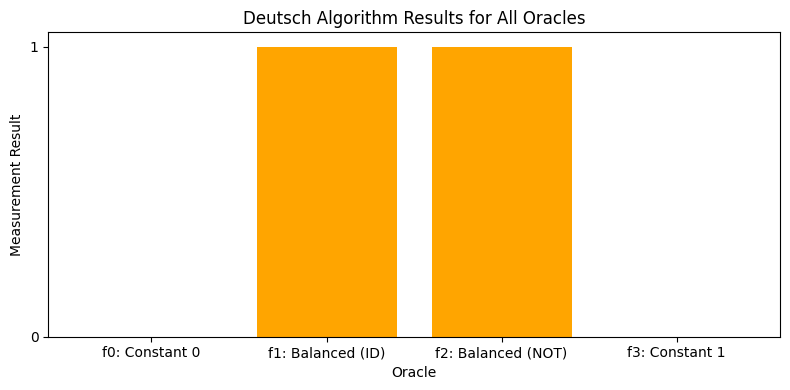

,Oracle,Measurement,Classification
0,f0: Constant 0,0,CONSTANT
1,f1: Balanced (ID),1,BALANCED
2,f2: Balanced (NOT),1,BALANCED
3,f3: Constant 1,0,CONSTANT


In [14]:
# Collect results for all oracles and plot one graph
oracle_names = []
measurements = []
classifications = []

for oracle, name in oracles:
    circuit = deutsch_algorithm(oracle)
    compiled = transpile(circuit, simulator)
    job = simulator.run(compiled, shots=1024)
    result = job.result()
    counts = result.get_counts()
    
    measurement = max(counts, key=counts.get)
    if measurement == '0':
        classification = "CONSTANT"
    else:
        classification = "BALANCED"
    
    oracle_names.append(name)
    measurements.append(measurement)
    classifications.append(classification)
    print(f"{name}: Measurement={measurement}, Classification={classification}, Counts={counts}")

# Plot all results in one bar chart
plt.figure(figsize=(8,4))
plt.bar(oracle_names, measurements, color=['royalblue' if c=="CONSTANT" else 'orange' for c in classifications])
plt.xlabel('Oracle')
plt.ylabel('Measurement Result')
plt.title("Deutsch Algorithm Results for All Oracles")
plt.tight_layout()
plt.show()

# Display summary table
import pandas as pd
df = pd.DataFrame({
    'Oracle': oracle_names,
    'Measurement': measurements,
    'Classification': classifications
})
display(df)

In [15]:
# Demonstrate quantum speedup comparison
print("\n" + "="*60)
print("QUANTUM ADVANTAGE SUMMARY")
print("="*60)
print("\nClassical approach (Problem 2):")
print("  - Must query f(0) AND f(1)")
print("  - Requires 2 function evaluations")
print("  - No way to reduce this")
print("\nQuantum approach (Deutsch's Algorithm):")
print("  - Query oracle with superposition (|0⟩ + |1⟩)/√2")
print("  - Evaluates f(0) and f(1) simultaneously")
print("  - Interference extracts global property")
print("  - Requires only 1 oracle query")
print("\n✓ Quantum speedup: 2x reduction in queries!")
print("✓ Deterministic result (not probabilistic)")
print("✓ First proof of quantum computational advantage")


QUANTUM ADVANTAGE SUMMARY

Classical approach (Problem 2):
  - Must query f(0) AND f(1)
  - Requires 2 function evaluations
  - No way to reduce this

Quantum approach (Deutsch's Algorithm):
  - Query oracle with superposition (|0⟩ + |1⟩)/√2
  - Evaluates f(0) and f(1) simultaneously
  - Interference extracts global property
  - Requires only 1 oracle query

✓ Quantum speedup: 2x reduction in queries!
✓ Deterministic result (not probabilistic)
✓ First proof of quantum computational advantage


---

## Problem 5: Scaling to the Deutsch-Jozsa Algorithm

---

### Problem Statement

**Question:** The [Deutsch-Jozsa algorithm](https://quantum.cloud.ibm.com/learning/en/modules/computer-science/deutsch-jozsa) generalizes Deutsch's approach to functions with several input bits. Use [Qiskit](https://www.ibm.com/quantum/qiskit) to create a quantum circuit that can handle the four-bit functions generated in Problem 1. Explain how the classical function is encoded as a quantum oracle, and demonstrate the use of your circuit on both of the constant functions and any two balanced functions of your choosing. Show that the circuit correctly identifies the type of each function.

### Background & Context

**From One Bit to Many**

Problems 3 and 4 gave us something remarkable: a quantum circuit that determines whether a single-input Boolean function is constant or balanced using just one oracle query, where any classical approach requires two. That result is clean and satisfying, but it leaves an obvious question hanging in the air. Single-input functions are a toy. In Problem 1, we were already working with functions that take four Boolean inputs, producing 16 possible input combinations and a function space containing over twelve thousand balanced possibilities. What happens when we try to apply the same quantum trick to functions at that scale?

The answer arrived in 1992, when [David Deutsch and Richard Jozsa](https://royalsocietypublishing.org/doi/10.1098/rspa.1992.0167) published their generalisation of the original algorithm. Rather than restricting themselves to functions with one input bit, they considered functions of the form $f: \{0,1\}^n \rightarrow \{0,1\}$, where $n$ can be any positive integer. The function still must be either constant or balanced in the same sense: returning the same output for every input, or returning 1 for exactly half the possible inputs and 0 for the other half. But now the input space has grown from 2 possibilities to $2^n$, and the classical cost of deciding between those two cases grows with it.

**The Classical Wall**

With a single input, a classical algorithm needs at most two queries to be certain. With $n$ inputs, the classical requirement becomes $2^{n-1} + 1$ queries in the worst case. This is not a weakness of any particular algorithm but a fundamental limit proven by [Beals, Buhrman, Cleve, Mosca and de Wolf (2001)](https://doi.org/10.1145/502090.502097): no deterministic classical strategy can do better. For four inputs, as in our problem, that means up to nine queries, which is exactly what we measured in Problem 2. For twenty inputs it would mean over half a million. The classical cost grows exponentially as the number of input bits increases.

The reason is straightforward. A classical algorithm can only ask one question at a time, and each query reveals the output for a single input. To rule out the possibility that a function is constant, you have to test more than half the inputs because a function that agrees on exactly half its inputs could still be balanced. You only become certain once you have seen more inputs give the same value than a balanced function would allow. That threshold is $2^{n-1} + 1$.

**The Quantum Answer Stays Constant**

The Deutsch-Jozsa algorithm answers this question with exactly one oracle query, regardless of $n$. Whether the function takes 1 input bit or 1,000, the quantum circuit consults the oracle once and returns the correct classification every time. As [Nielsen and Chuang (2010)](https://www.academia.edu/41154803/Quantum_Computation_and_Quantum_Information_by_Nielsen_and_Chuang) describe it, this is an exponential separation between classical and quantum query complexity for a well-defined computational problem, not a clever trick but a provable mathematical fact.

The mechanism is the same as Deutsch's original algorithm scaled up. Instead of placing a single qubit in superposition before querying the oracle, we place all $n$ input qubits in superposition simultaneously. Applying a [Hadamard gate](https://www.quantum-inspire.com/kbase/hadamard/) to an individual qubit in the $|0\rangle$ state produces an equal superposition of $|0\rangle$ and $|1\rangle$. When we apply Hadamard gates to all $n$ input qubits at once, the result is an equal superposition of all $2^n$ possible input combinations simultaneously. In our four-input case, that is all sixteen inputs from 0000 to 1111, all present in the quantum state at the same moment.

**What the Oracle Sees**

When the oracle is applied to this superposition, it does not evaluate the function once. It effectively evaluates the function on every possible input in parallel, encoding the results into the quantum phases of the state. This is the quantum parallelism that [Cleve, Ekert, Macchiavello and Mosca (1998)](https://royalsocietypublishing.org/doi/10.1098/rspa.1998.0164) formalised as the key property distinguishing quantum query algorithms from their classical counterparts.

The oracle itself follows the same reversible construction from Problem 3, the transformation $|x\rangle|y\rangle \rightarrow |x\rangle|y \oplus f(x)\rangle$, but now $x$ is an $n$-bit string rather than a single bit. To build this oracle for our four-bit functions we need to encode the function's truth table into a quantum circuit that can act on superpositions. This encoding is what Problem 1 was quietly preparing us for: having a precise, enumerated lookup table for every possible input combination is exactly the information the oracle construction requires.

**Interference at Scale**

After the oracle runs, a final round of Hadamard gates is applied to all $n$ input qubits. Just as a single Hadamard gate created constructive or destructive interference for the one-bit case, $n$ Hadamard gates create interference across the entire $2^n$ dimensional space of the quantum state. The mathematics of this step, worked out carefully by [Deutsch and Jozsa (1992)](https://royalsocietypublishing.org/doi/10.1098/rspa.1992.0167) and later presented more clearly by Cleve et al., shows that when the function is constant, all that interference adds up constructively to produce the all-zeros bit string $|00...0\rangle$ with certainty. When the function is balanced, the interference is destructive for the all-zeros outcome, meaning we will measure something other than all zeros with certainty. The measurement outcome directly reveals the function type, and we have only called the oracle once to get there.

**The Circuit We Need to Build**

Scaling from Problem 4 to Problem 5 means scaling the circuit from two qubits to $n + 1$ qubits, where the extra qubit is the ancilla output qubit that enables phase kickback. For our four-input functions, the circuit will use five qubits in total: four input qubits and one output ancilla. The preparation step applies an X gate to the ancilla followed by Hadamard gates on all five qubits. The oracle sits in the middle, encoding the function, and a final set of Hadamard gates on the four input qubits precedes the measurement. It is the same five-stage structure from Deutsch's algorithm, just broader.

The oracle construction for a four-bit function is more involved than for a single-bit function. We have sixteen possible inputs to account for, and balanced functions can distribute their outputs in $\binom{16}{8} = 12{,}870$ distinct ways. [Aaronson (2013)](https://dl.acm.org/doi/book/10.5555/2487754) notes in *Quantum Computing Since Democritus* that oracle construction is where the theoretical elegance of quantum algorithms meets the practical complexity of circuit design. The function's truth table must be translated into a reversible circuit using gates that [Qiskit](https://www.ibm.com/quantum/qiskit) can execute, a process that typically involves multi-controlled NOT gates to flip the ancilla qubit for each input combination that produces a 1.

**Why This Problem Matters**

The Deutsch-Jozsa algorithm is not a practically useful computation in the everyday sense. Nobody needs an exponentially fast method for classifying artificial Boolean functions. Its significance lies in what it proves. It was the first algorithm to demonstrate a provable exponential quantum speedup over classical computation, and it did so in a setting clean enough to admit a full mathematical proof rather than a conjecture. As [Preskill (2018)](https://doi.org/10.22331/q-2018-08-06-79) reflects in his survey of the quantum computing landscape, Deutsch-Jozsa established the conceptual template that later algorithms like [Shor's factoring algorithm](https://doi.org/10.1137/S0097539795293172) and [Grover's search](https://doi.org/10.1145/237814.237866) would go on to apply to genuinely useful problems. The pattern of superposition, oracle query, and interference extraction recurs throughout quantum algorithm design, and this problem is where we implement it at the scale it was originally intended for.


### Approach & Reasoning

### Implementation

### Test Cases

### Results & Demonstration

### Interpretation & Discussion

### Efficiency & Limitations

### References & Sources